In [2]:
import numpy as np
import pandas as pd
import scanpy.api as sc
import matplotlib.pyplot as plt

sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=80, color_map='viridis')# verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
#sc.settings.figdir = './paper_figures/'

/anaconda3/lib/python3.6/site-packages/scanpy/api/__init__.py:6: FutureWarning: 

In a future version of Scanpy, `scanpy.api` will be removed.
Simply use `import scanpy as sc` and `import scanpy.external as sce` instead.

  FutureWarning,


scanpy==1.4.6 anndata==0.7.1 umap==0.3.10 numpy==1.15.4 scipy==1.4.1 pandas==0.23.4 scikit-learn==0.22.1 statsmodels==0.11.0rc1 python-igraph==0.7.1 louvain==0.6.1


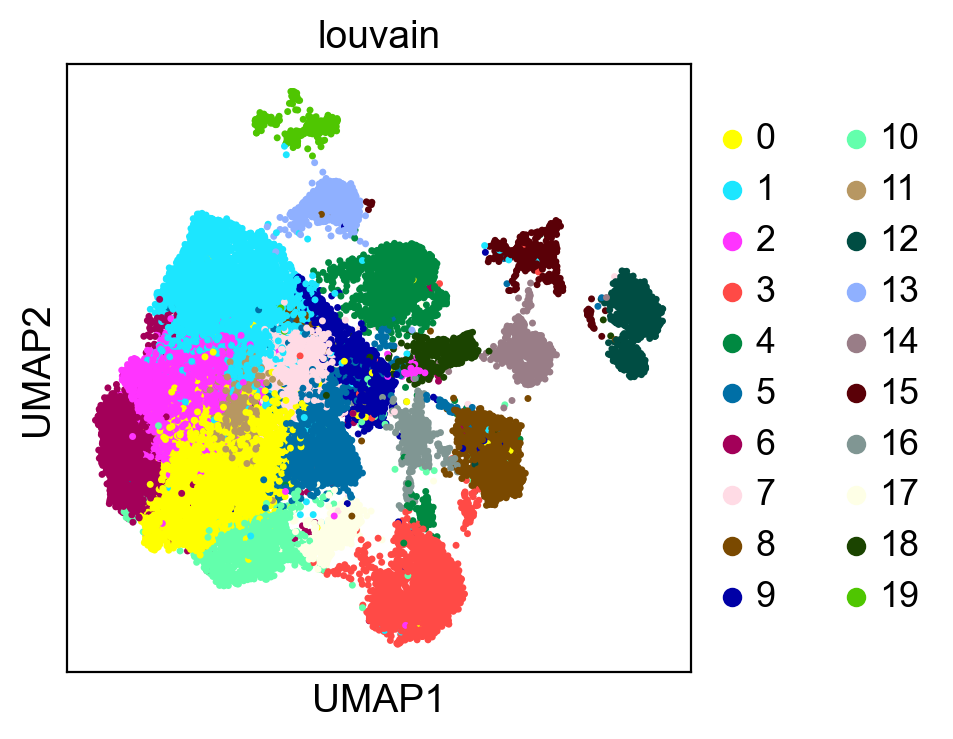

AnnData object with n_obs × n_vars = 34069 × 2608 
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain', 'patient_id', 'patient_tumorsection', 'NormalvsTumor', 'patientno', 'PNC', 'PIC', 'ViralvsNonViral', 'clinician_patientname', 'gender', 'IL7R_expr', 'CD8A_expr', 'GNLY_expr', 'NKG7_expr', 'KLRC2_expr', 'CLIC3_expr', 'KRT86_expr', 'KLRC1_expr', 'TIGIT_expr', 'CRTAM_expr', 'MYOM2_expr', 'B3GNT7_expr', 'STMN1_expr', 'TNFSF14_expr', 'CXCL13_expr', 'CCR7_expr'
    var: 'gene_ids', 'n_cells'
    uns: 'NormalvsTumor_colors', 'PNC_colors', 'ViralvsNonViral_colors', 'louvain', 'louvain_colors', 'neighbors', 'patientno_colors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

louvain,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
NormalvsTumor,,,,,,,,,,,,,,,,,,,,
N,683,1858,836,313,625,294,323,658,99,269,143,340,114,500,35,99,100,19,83,237
T,5047,2542,2580,2435,1327,1658,1616,1010,1319,1126,1137,707,922,247,665,567,447,525,404,160


NormalvsTumor,N,T
louvain,,
0,11.919721,88.080279
1,42.227273,57.772727
2,24.473068,75.526932
3,11.390102,88.609898
4,32.018443,67.981557
5,15.061475,84.938525
6,16.658071,83.341929
7,39.448441,60.551559
8,6.981664,93.018336


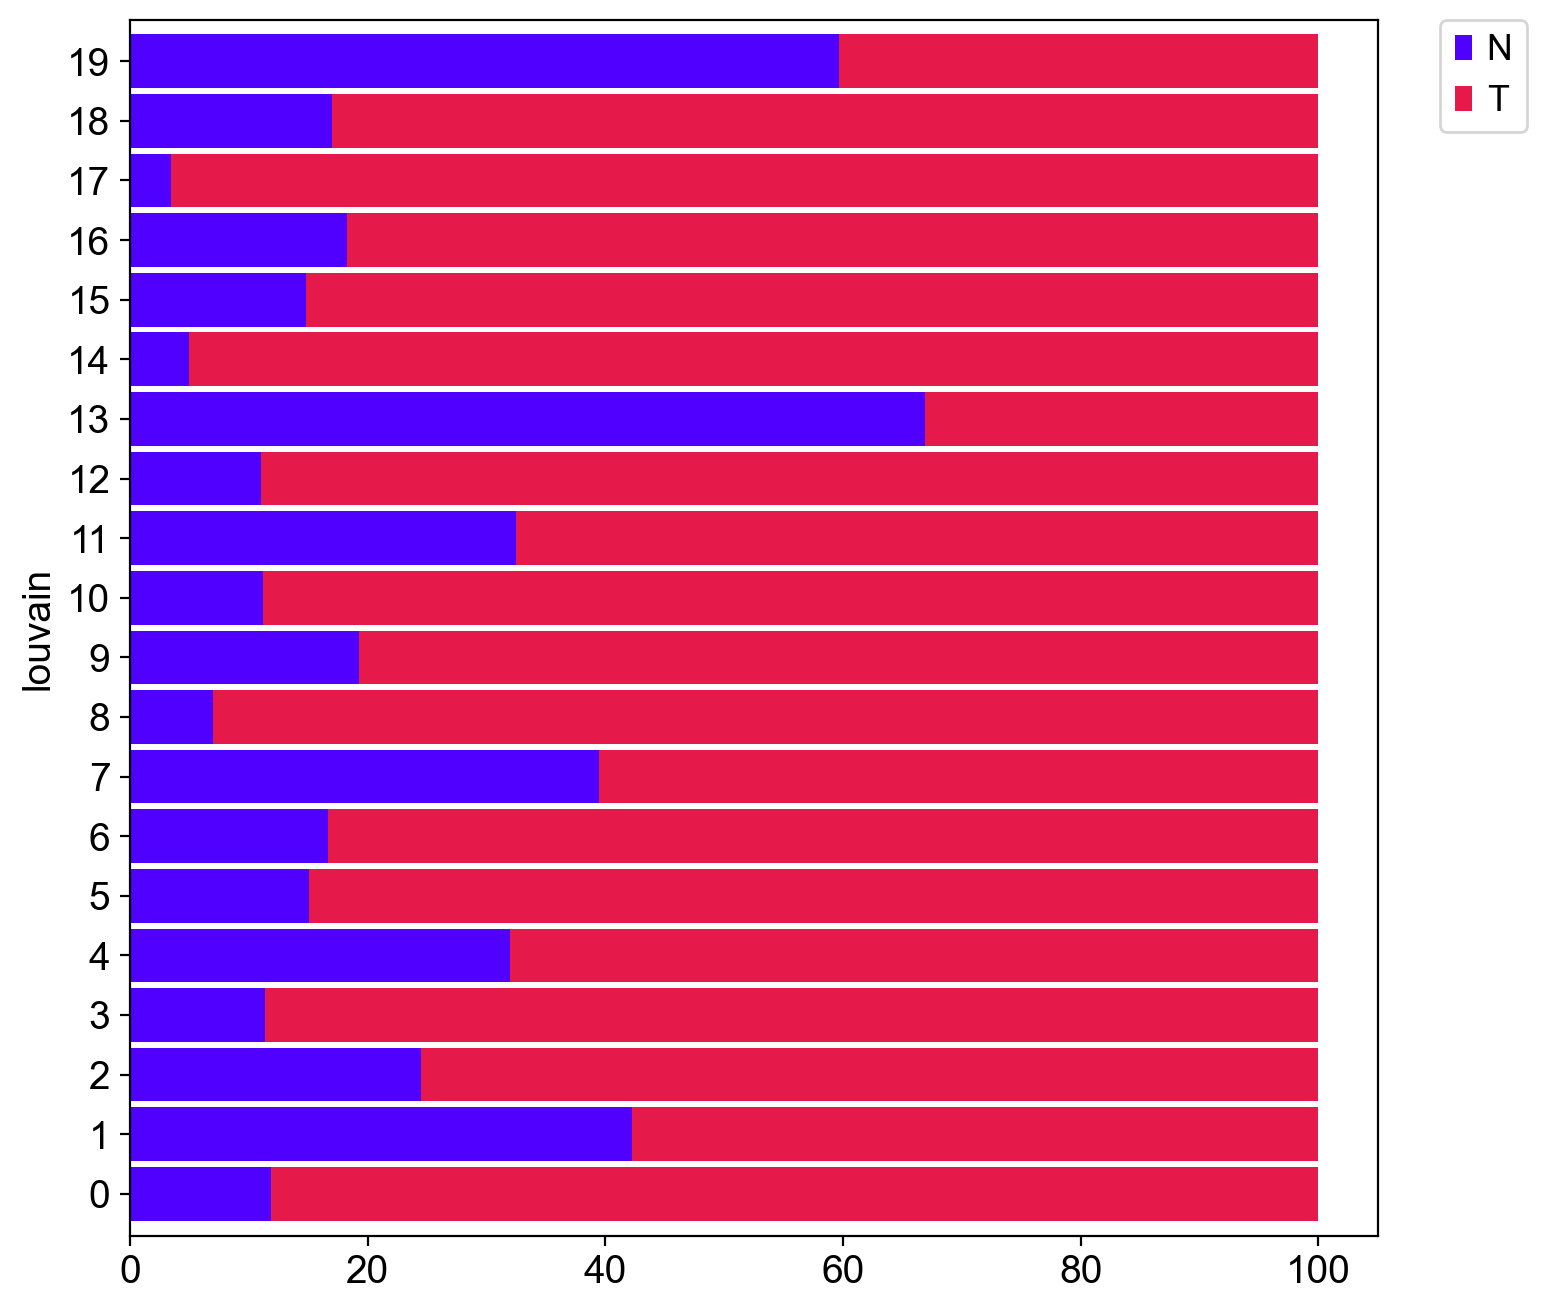

In [6]:
adata = sc.read("./data/tcells.h5ad")

sc.settings.set_figure_params(dpi=100)
sc.pl.umap(adata, color='louvain', size = 25)#, save='_louvain.png')
display(adata)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

#count = pd.read_csv('patientno_count.csv', header=None, index_col=0)
#df = adata.obs.groupby(['patientno','louvain']).size().unstack().fillna(0)
#df.to_csv('/Users/justineseowjiawen/Documents/liver revision/tcells_clperpatient.csv')
#df = df.div(count.iloc[:,0], axis=0)
#df1 = df.apply(lambda x: x/sum(x)*100, axis = 0).transpose()
#ax = df1.plot.barh(stacked=True, color=adata.uns['patientno_colors'], width=0.9)
#ax.grid(False)
#ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#fig = ax.get_figure()
#fig.savefig('./paper_figures1/tcells/barplot_tcells_patient.pdf')

#df1.to_csv('/Users/justineseowjiawen/Documents/liver revision/tcells_clperpatientnorm.csv')



df = adata.obs.groupby(['NormalvsTumor','louvain']).size().unstack().fillna(0)
display(df)
df1 = df.apply(lambda x: x/sum(x)*100, axis = 0).transpose()
display(df1)
ax = df1.plot.barh(stacked=True, color=adata.uns['NormalvsTumor_colors'], width=0.9)
ax.grid(False)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = ax.get_figure()
#fig.savefig('./paper_figures1/tcells/barplot_tcells_NT.pdf')

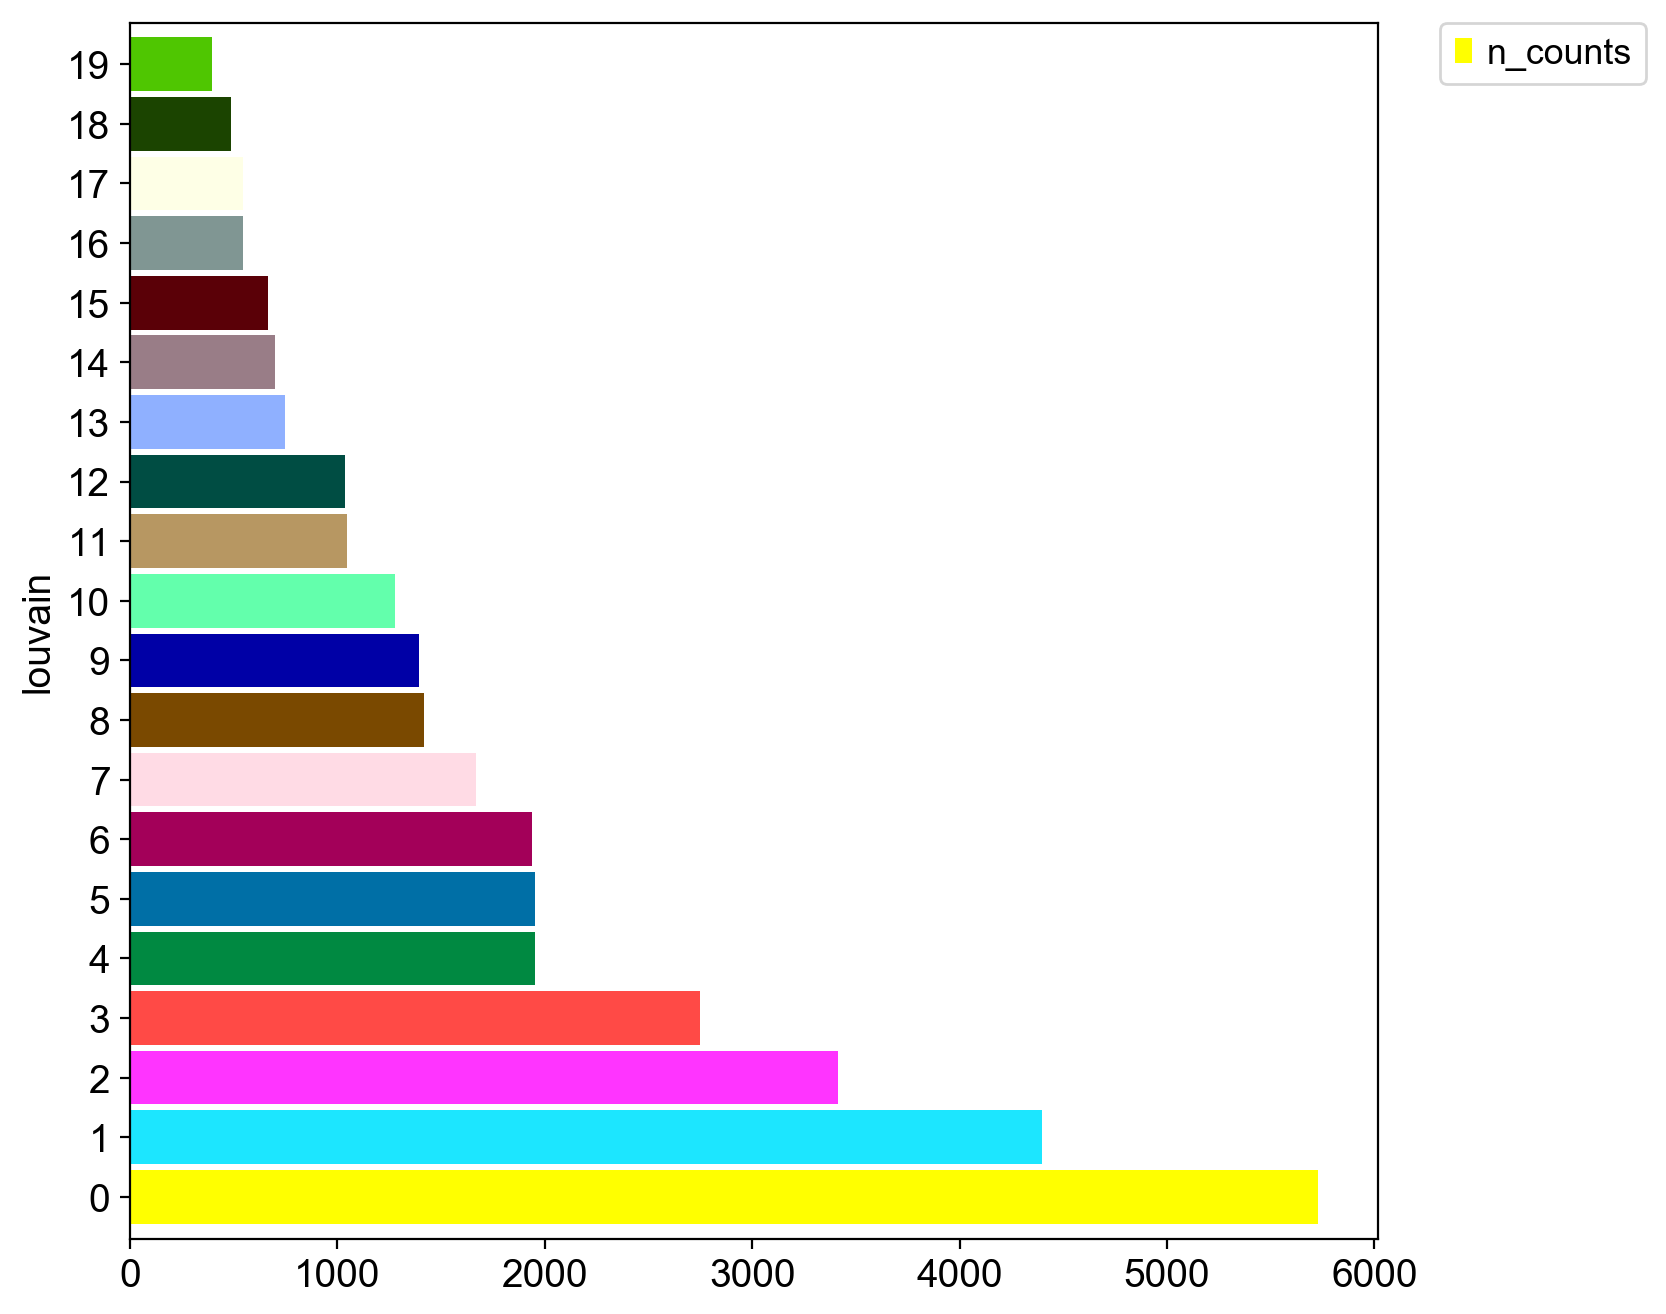

In [3]:
df =  adata.obs.groupby(['louvain']).count()['n_counts']
ax = df.plot.barh(width=0.9, color=adata.uns['louvain_colors'])
ax.grid(False)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = ax.get_figure()
fig.savefig('./paper_figures1/tcells/barplot_tcells_nocell.pdf')

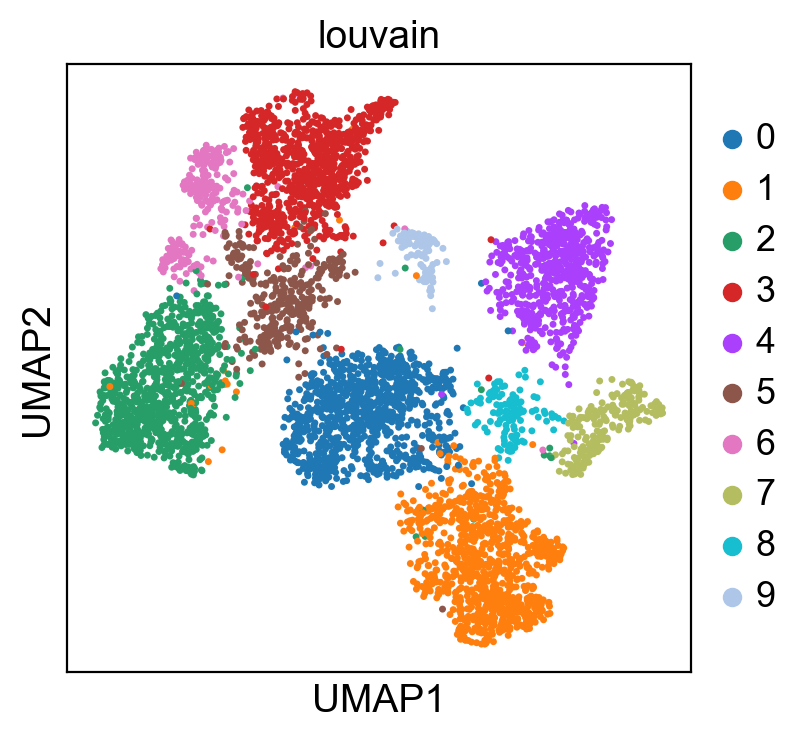

AnnData object with n_obs × n_vars = 5219 × 2608 
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain', 'patient_id', 'patient_tumorsection', 'NormalvsTumor', 'patientno', 'PNC', 'PIC', 'ViralvsNonViral'
    var: 'gene_ids', 'n_cells'
    uns: 'NormalvsTumor_colors', 'PNC_colors', 'ViralvsNonViral_colors', 'louvain', 'louvain_colors', 'neighbors', 'patientno_colors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

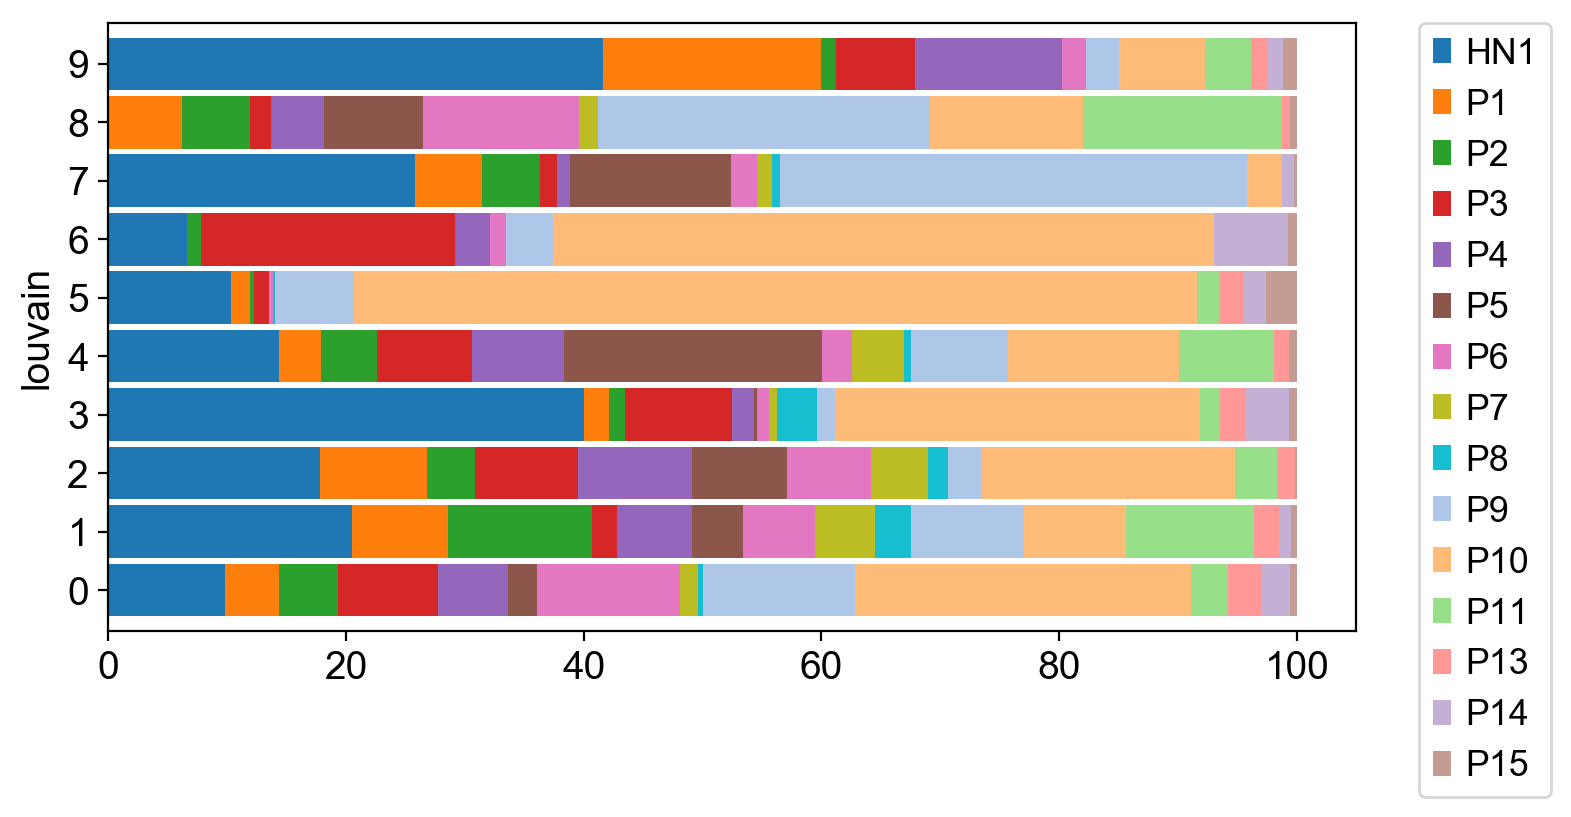

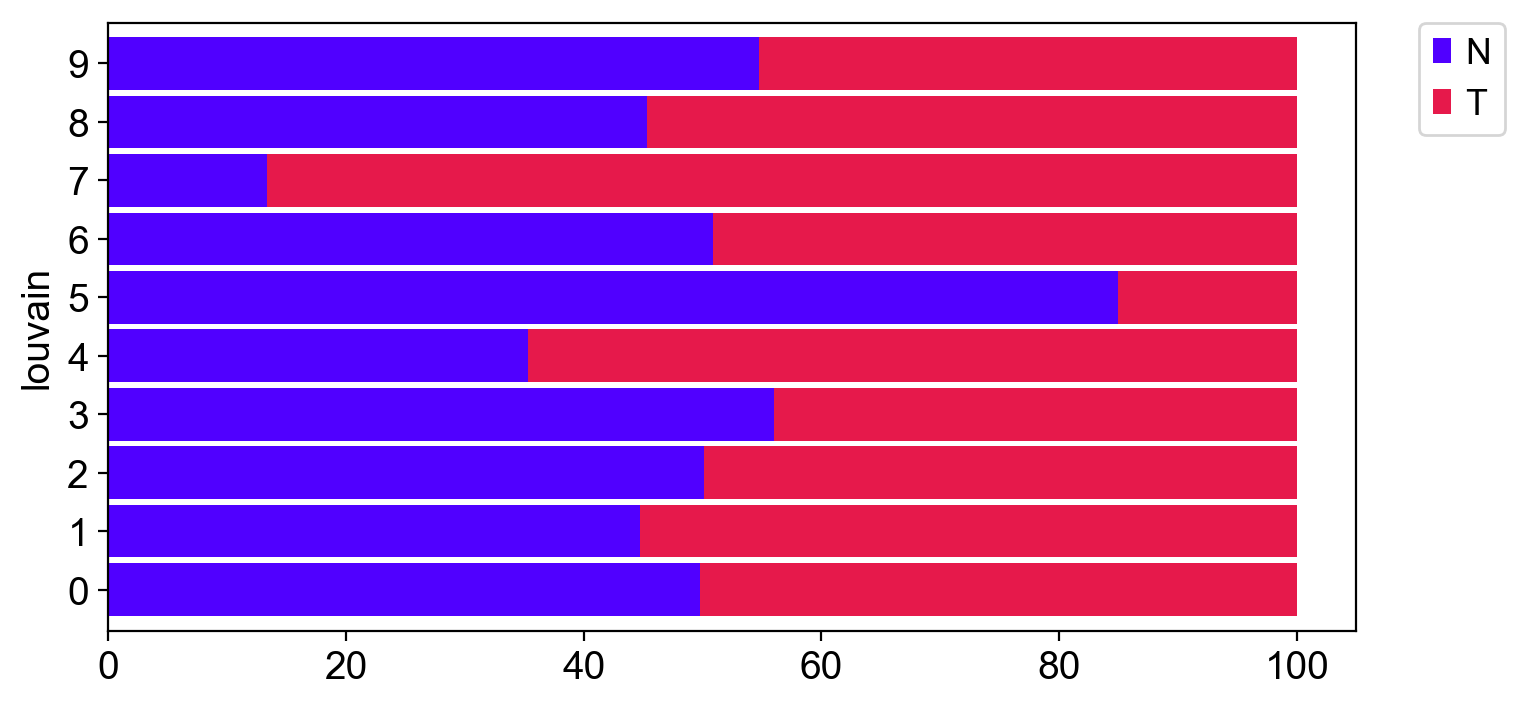

In [10]:
adata = sc.read("./data/NK_recluster.h5ad")

sc.settings.set_figure_params(dpi=100)
sc.pl.umap(adata, color='louvain', size = 25)#, save='_louvain.png')
display(adata)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size

count = pd.read_csv('patientno_count.csv', header=None, index_col=0)
df = adata.obs.groupby(['patientno','louvain']).size().unstack().fillna(0)
df = df.div(count.iloc[:,0], axis=0)
df1 = df.apply(lambda x: x/sum(x)*100, axis = 0).transpose()
ax = df1.plot.barh(stacked=True, color=adata.uns['patientno_colors'], width=0.9)
ax.grid(False)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = ax.get_figure()
fig.savefig('./paper_figures1/NK/barplot_NK_patient.pdf')

df = adata.obs.groupby(['NormalvsTumor','louvain']).size().unstack().fillna(0)
df1 = df.apply(lambda x: x/sum(x)*100, axis = 0).transpose()
ax = df1.plot.barh(stacked=True, color=adata.uns['NormalvsTumor_colors'], width=0.9)
ax.grid(False)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = ax.get_figure()
fig.savefig('./paper_figures1/NK/barplot_NK_NT.pdf')

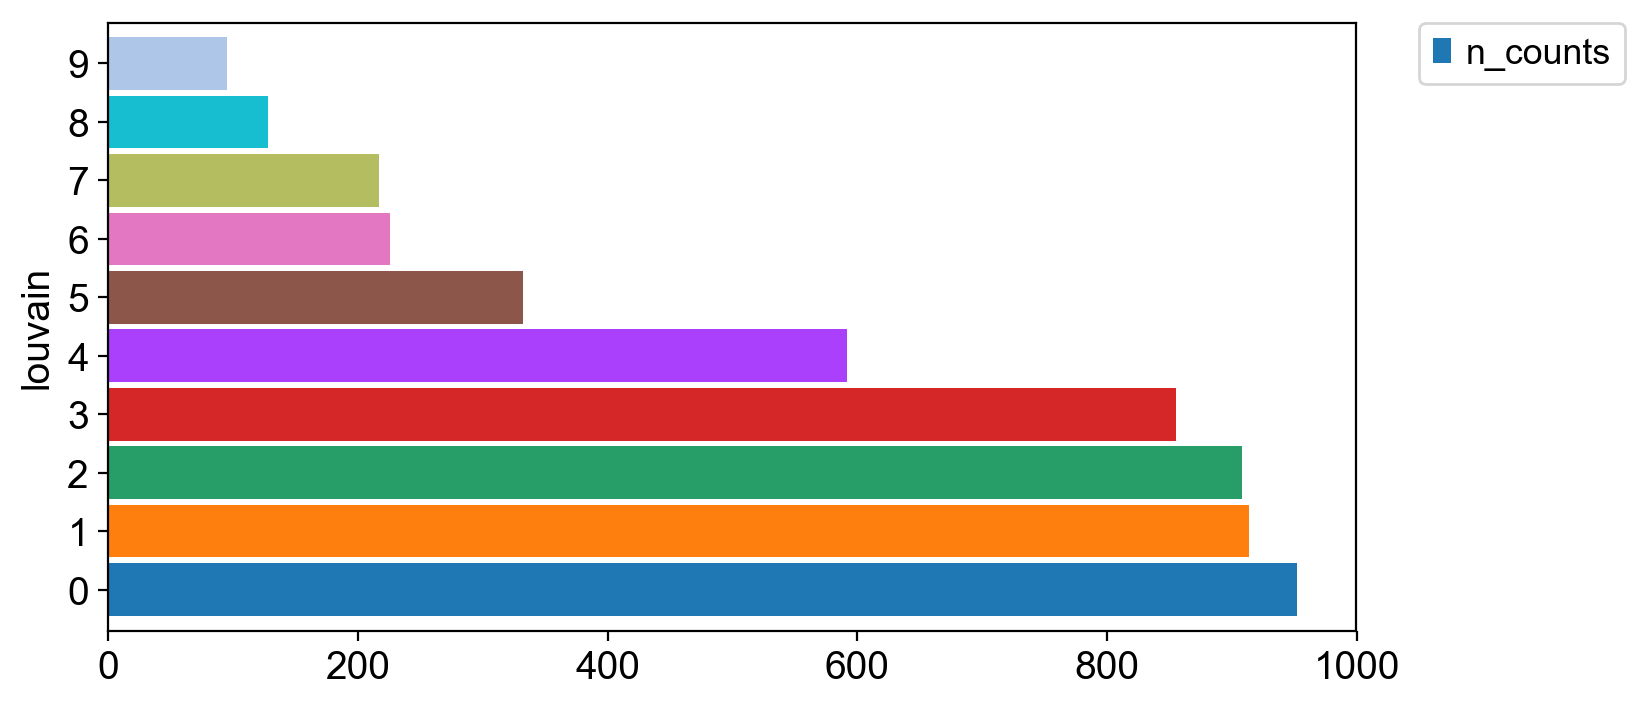

In [11]:
df =  adata.obs.groupby(['louvain']).count()['n_counts']
ax = df.plot.barh(width=0.9, color=adata.uns['louvain_colors'])
ax.grid(False)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = ax.get_figure()
fig.savefig('./paper_figures1/NK/barplot_imm_nocell.pdf')

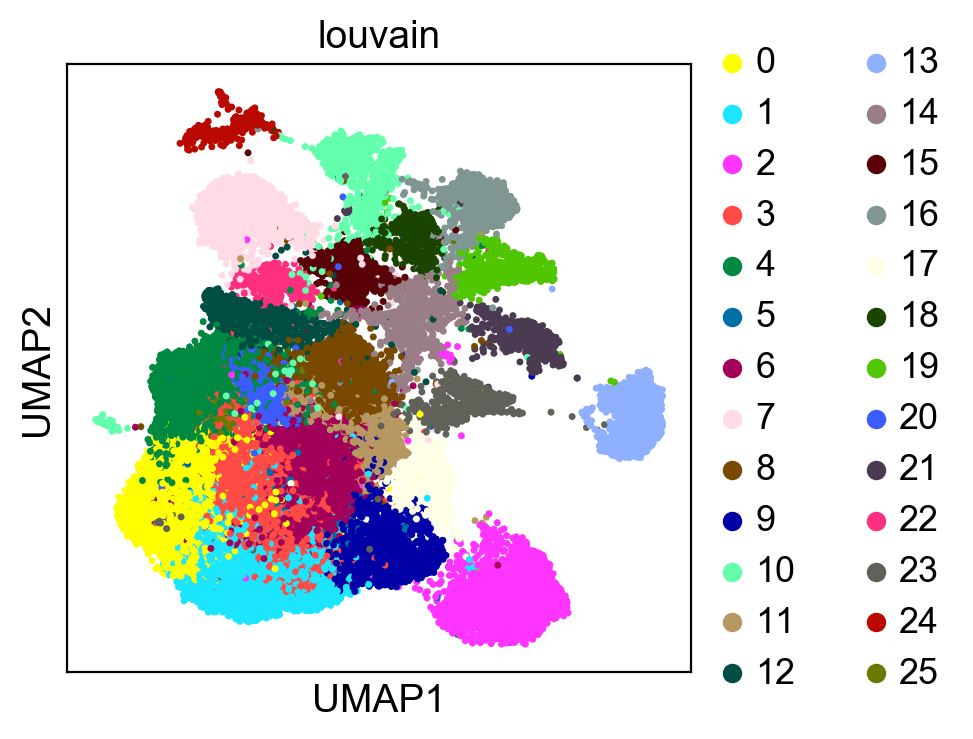

AnnData object with n_obs × n_vars = 39288 × 2608 
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain', 'patient_id', 'patient_tumorsection', 'NormalvsTumor', 'patientno', 'PNC', 'PIC', 'ViralvsNonViral'
    var: 'gene_ids', 'n_cells'
    uns: 'NormalvsTumor_colors', 'PNC_colors', 'ViralvsNonViral_colors', 'louvain', 'louvain_colors', 'neighbors', 'patientno_colors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

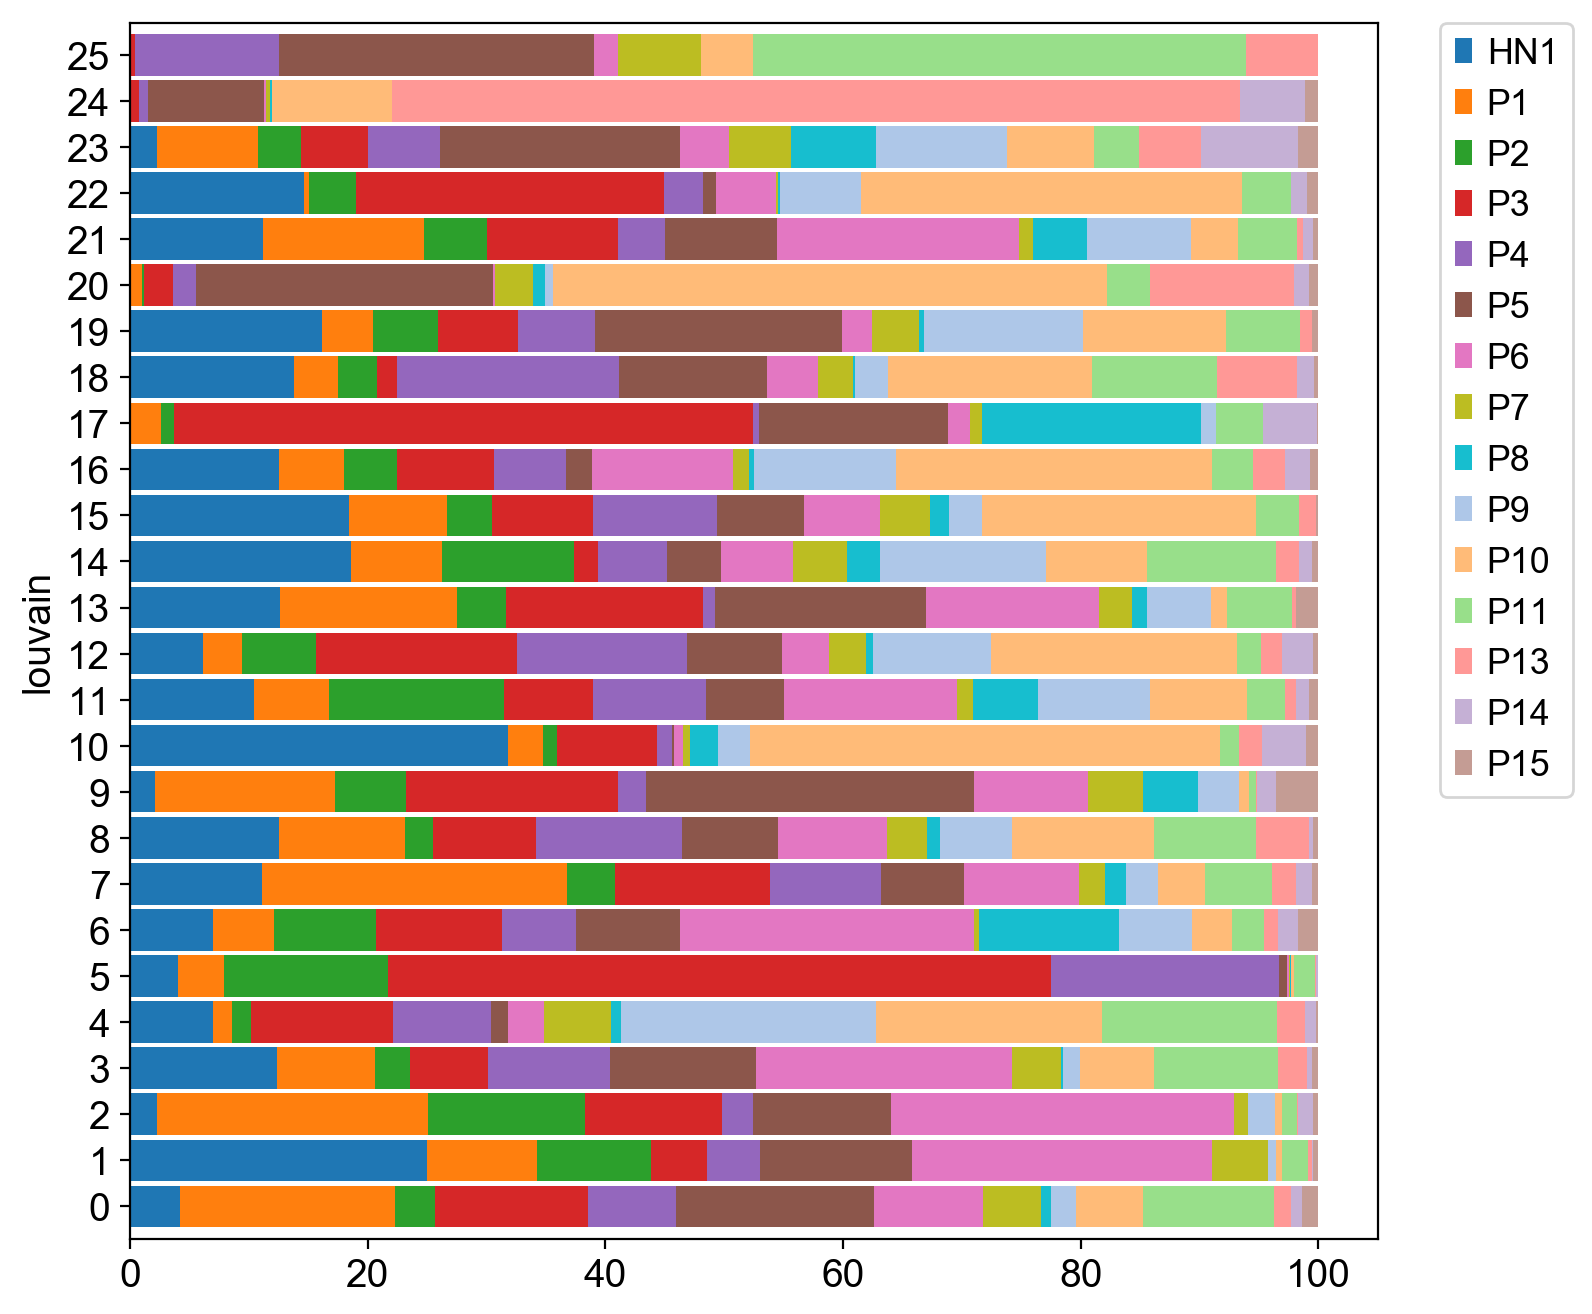

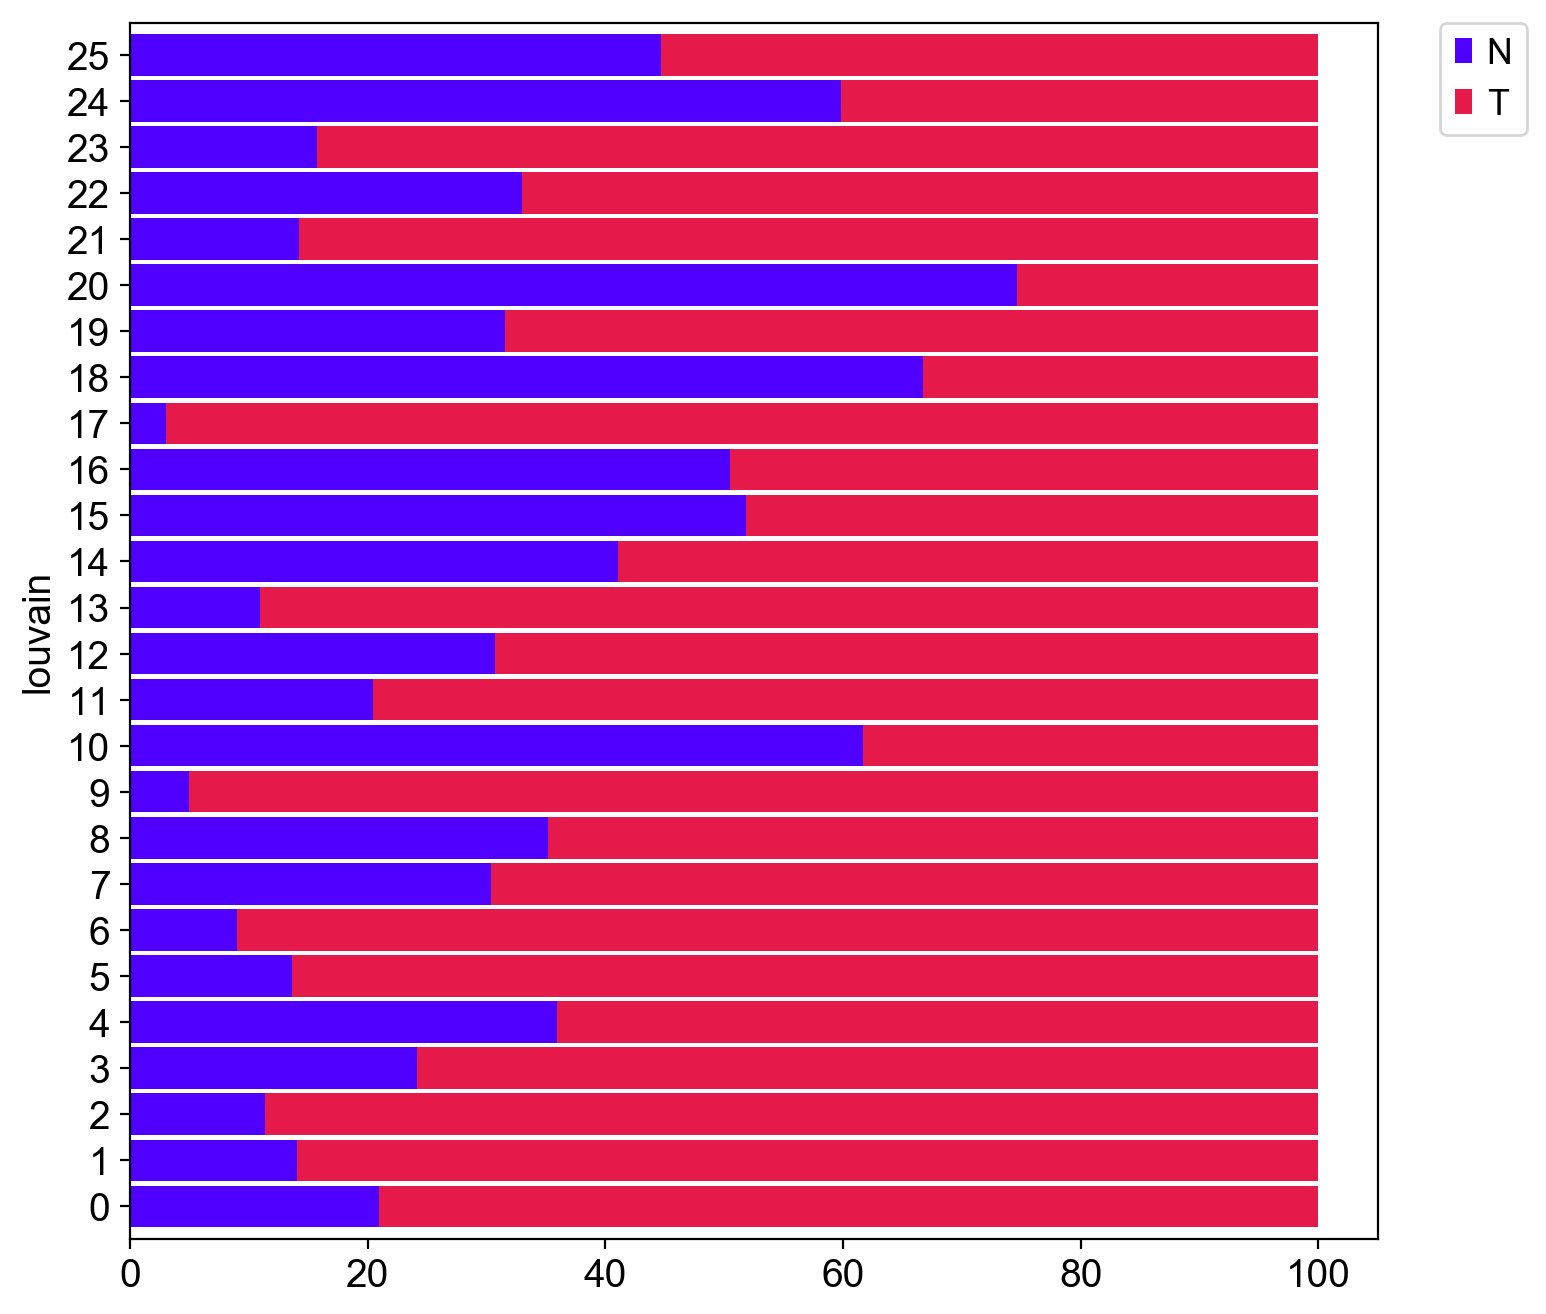

In [4]:
adata = sc.read("./data/immune.h5ad")

sc.settings.set_figure_params(dpi=100)
sc.pl.umap(adata, color='louvain', size = 25)#, save='_louvain.png')
display(adata)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

count = pd.read_csv('patientno_count.csv', header=None, index_col=0)
df = adata.obs.groupby(['patientno','louvain']).size().unstack().fillna(0)
df = df.div(count.iloc[:,0], axis=0)
df1 = df.apply(lambda x: x/sum(x)*100, axis = 0).transpose()
ax = df1.plot.barh(stacked=True, color=adata.uns['patientno_colors'], width=0.9)
ax.grid(False)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = ax.get_figure()
fig.savefig('barplot_imm_patient.pdf')

df = adata.obs.groupby(['NormalvsTumor','louvain']).size().unstack().fillna(0)
df1 = df.apply(lambda x: x/sum(x)*100, axis = 0).transpose()
ax = df1.plot.barh(stacked=True, color=adata.uns['NormalvsTumor_colors'], width=0.9)
ax.grid(False)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = ax.get_figure()
fig.savefig('barplot_imm_NT.pdf')

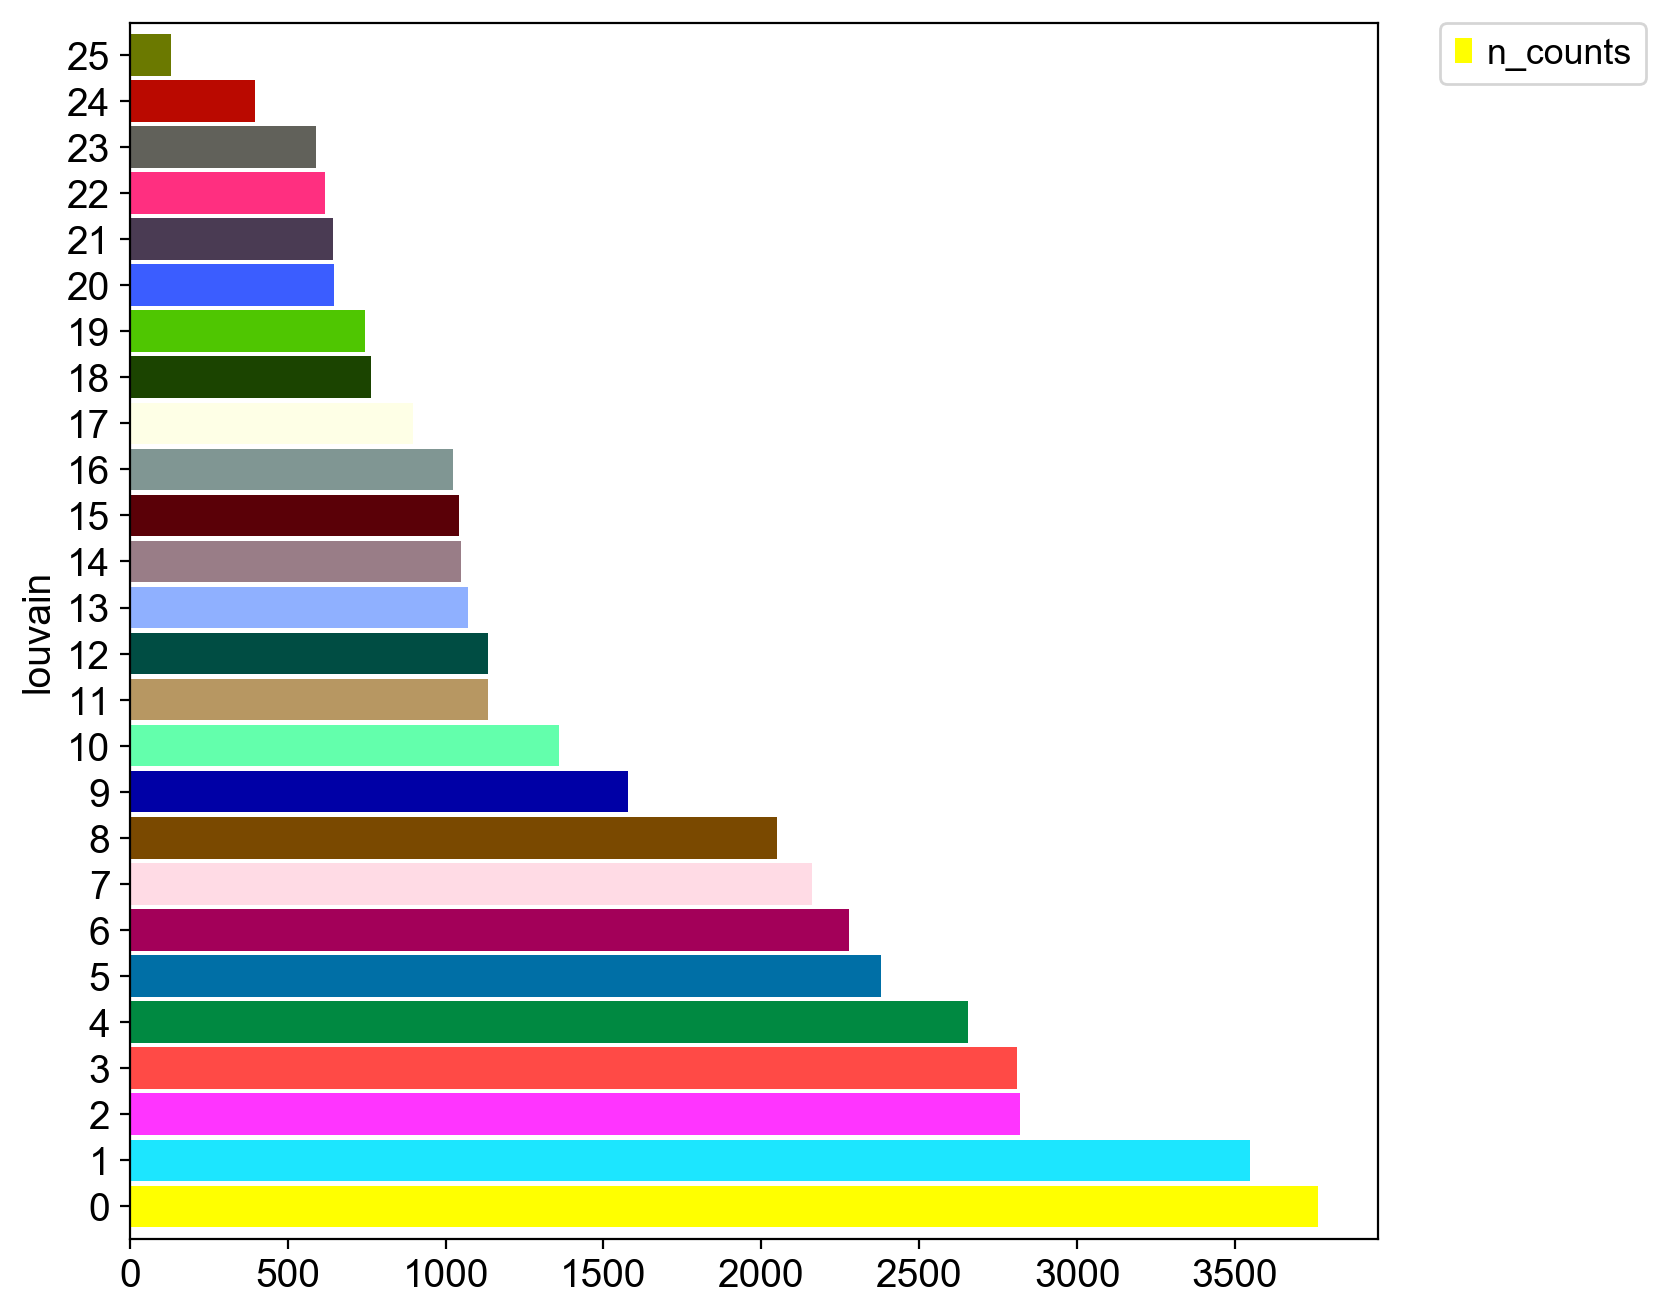

In [5]:
df =  adata.obs.groupby(['louvain']).count()['n_counts']
ax = df.plot.barh(width=0.9, color=adata.uns['louvain_colors'])
ax.grid(False)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = ax.get_figure()
fig.savefig('barplot_imm_nocell.pdf')

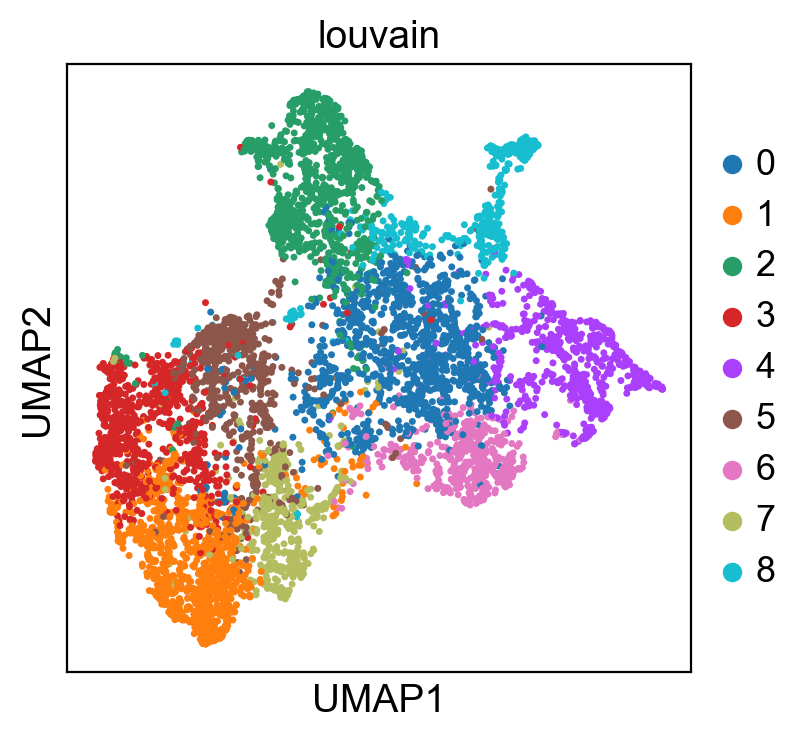

AnnData object with n_obs × n_vars = 6898 × 2384 
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain', 'patient_id', 'patientno', 'patient_tumorsection', 'ViralvsNonViral', 'PNC', 'PIC', 'NormalvsTumor', 'median genes exp', 'dpt_pseudotime', 'DC1', 'DC2', 'pDC'
    var: 'gene_ids', 'n_cells'
    uns: 'NormalvsTumor_colors', 'ViralvsNonViral_colors', 'diffmap_evals', 'draw_graph', 'iroot', 'louvain', 'louvain_colors', 'louvain_sizes', 'neighbors', 'paga', 'patientno_colors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap', 'X_draw_graph_fr', 'X_diffmap'
    varm: 'PCs'

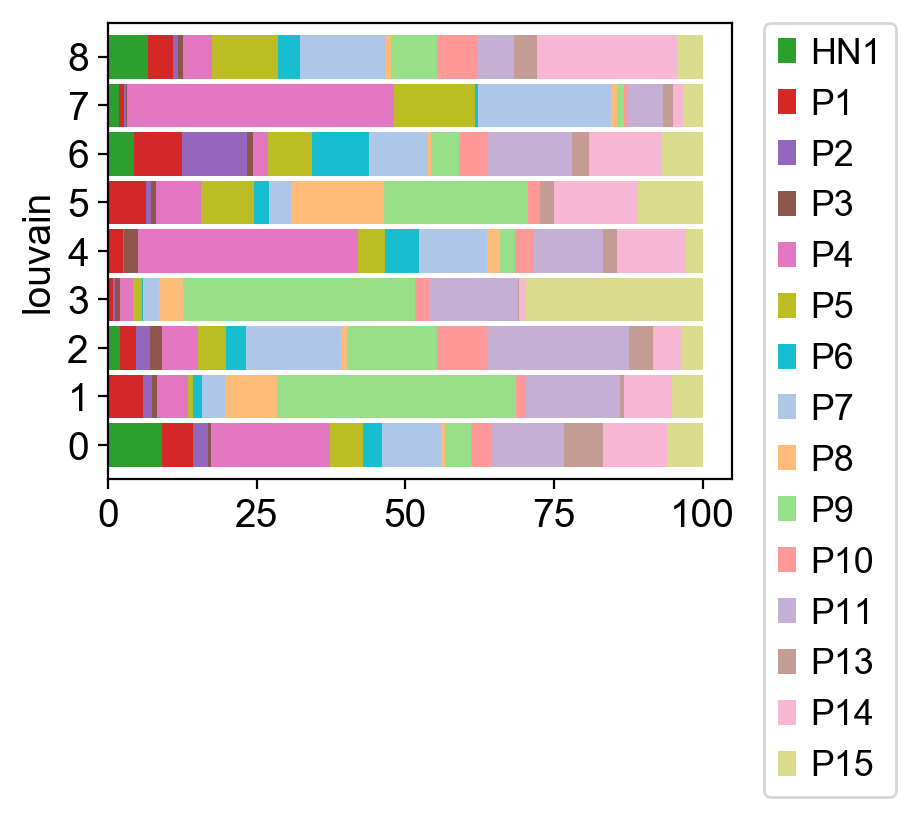

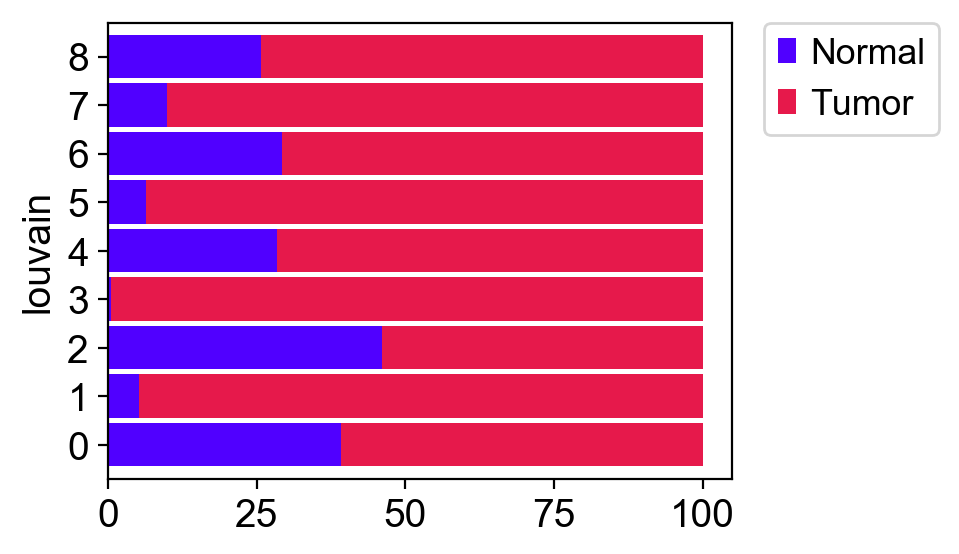

In [3]:
adata = sc.read("/Users/justineseowjiawen/Dropbox/Liver_Paper/HCC_F1F2/data/HCCmyewoF.h5ad")

sc.settings.set_figure_params(dpi=100)
sc.pl.umap(adata, color='louvain', size = 25)#, save='_louvain.png')
display(adata)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 4
fig_size[1] = 3
plt.rcParams["figure.figsize"] = fig_size

count = pd.read_csv('patientno_count.csv', header=None, index_col=0)
df = adata.obs.groupby(['patientno','louvain']).size().unstack().fillna(0)
df = df.div(count.iloc[:,0], axis=0)
df1 = df.apply(lambda x: x/sum(x)*100, axis = 0).transpose()
ax = df1.plot.barh(stacked=True, color=adata.uns['patientno_colors'], width=0.9)
ax.grid(False)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = ax.get_figure()
fig.savefig('./paper_figures1/myeloid/barplot_myewob_patient.pdf')

df = adata.obs.groupby(['NormalvsTumor','louvain']).size().unstack().fillna(0)
df1 = df.apply(lambda x: x/sum(x)*100, axis = 0).transpose()
ax = df1.plot.barh(stacked=True, color=['#5000ff', '#e6194B'], width=0.9)
ax.grid(False)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = ax.get_figure()
fig.savefig('./paper_figures1/myeloid/barplot_myewob_NT.pdf')


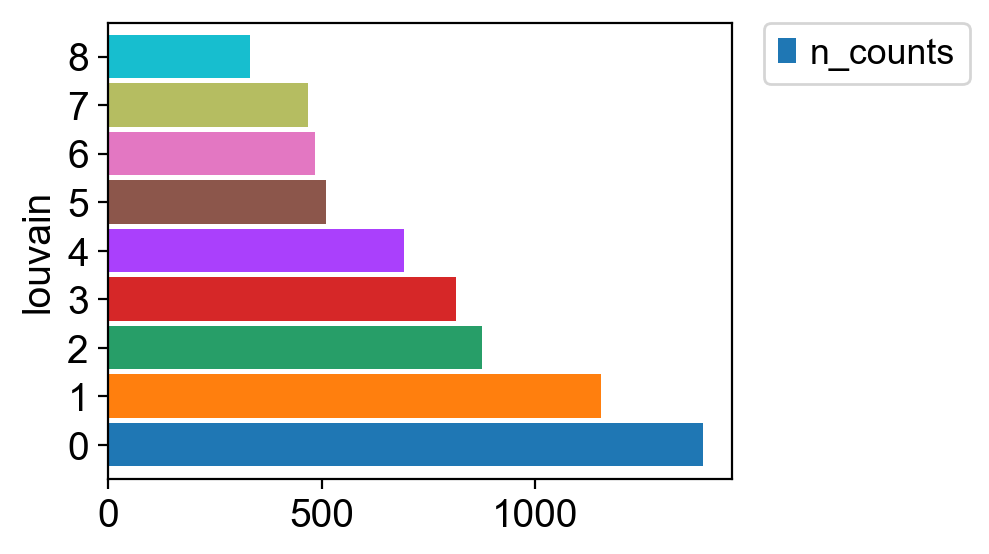

In [18]:
df = adata.obs.groupby(['louvain']).count()['n_counts']
ax = df.plot.barh(width=0.9, color=adata.uns['louvain_colors'])
ax.grid(False)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = ax.get_figure()
fig.savefig('./paper_figures1/myeloid/barplot_myewob_nocell.pdf')

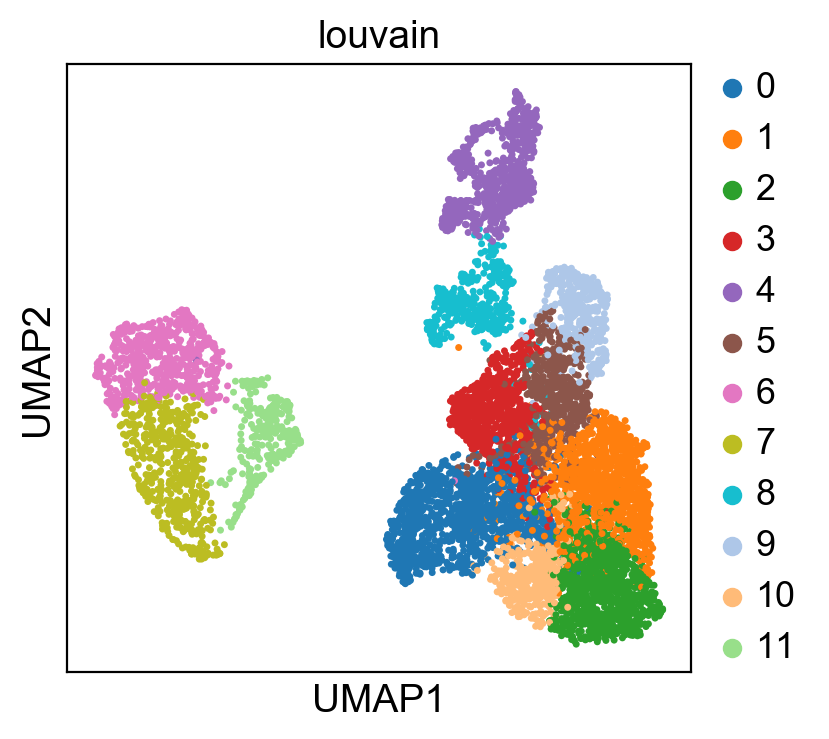

AnnData object with n_obs × n_vars = 8102 × 2608 
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain', 'patient_id', 'patient_tumorsection', 'NormalvsTumor', 'patientno', 'PNC', 'PIC', 'ViralvsNonViral', 'median genes exp'
    var: 'gene_ids', 'n_cells'
    uns: 'NormalvsTumor_colors', 'PNC_colors', 'ViralvsNonViral_colors', 'louvain', 'louvain_colors', 'neighbors', 'patientno_colors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

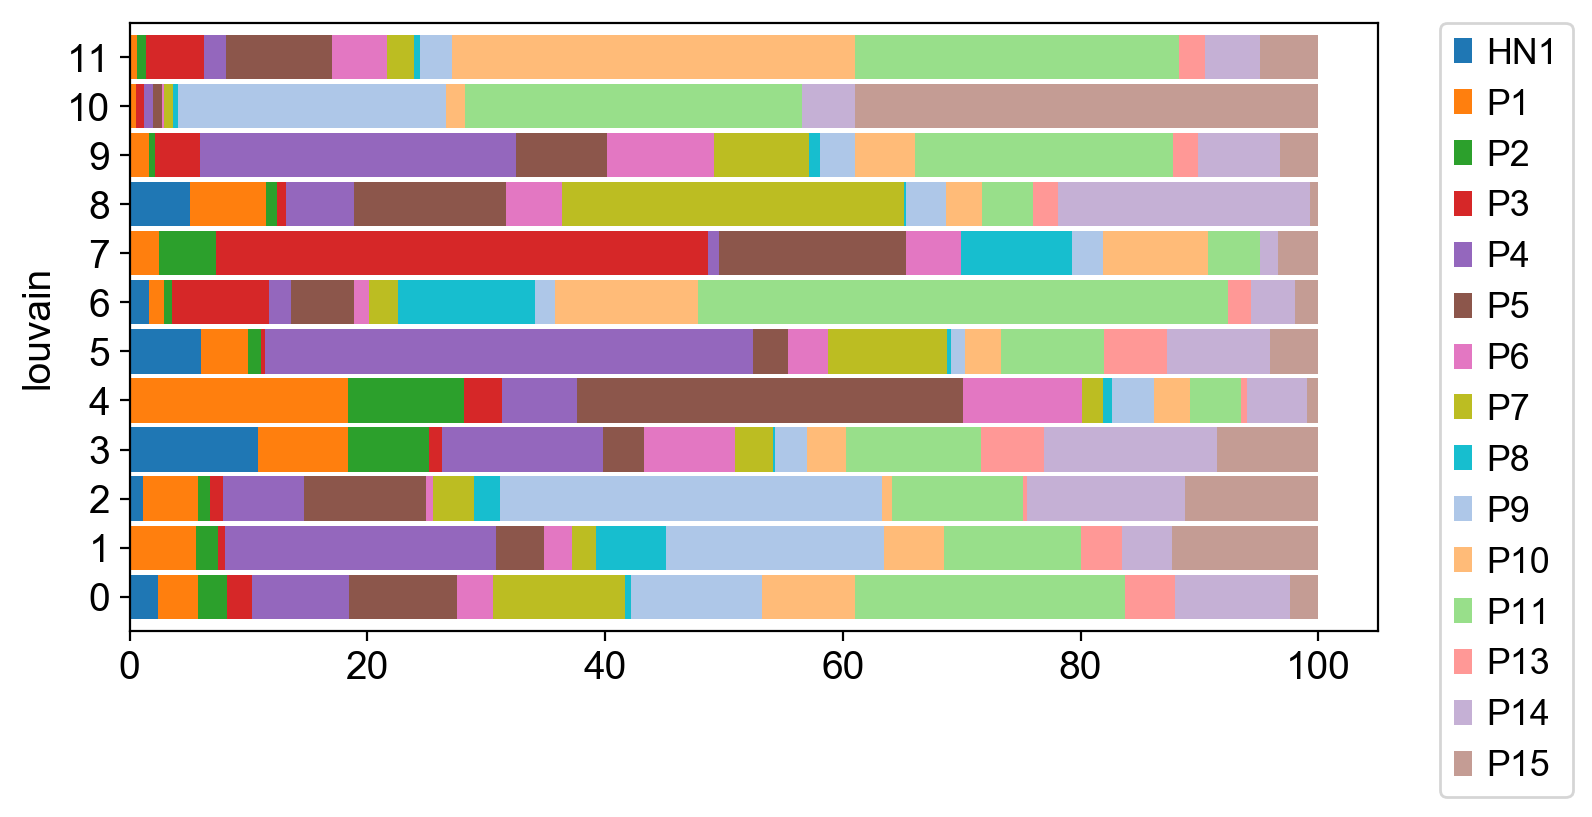

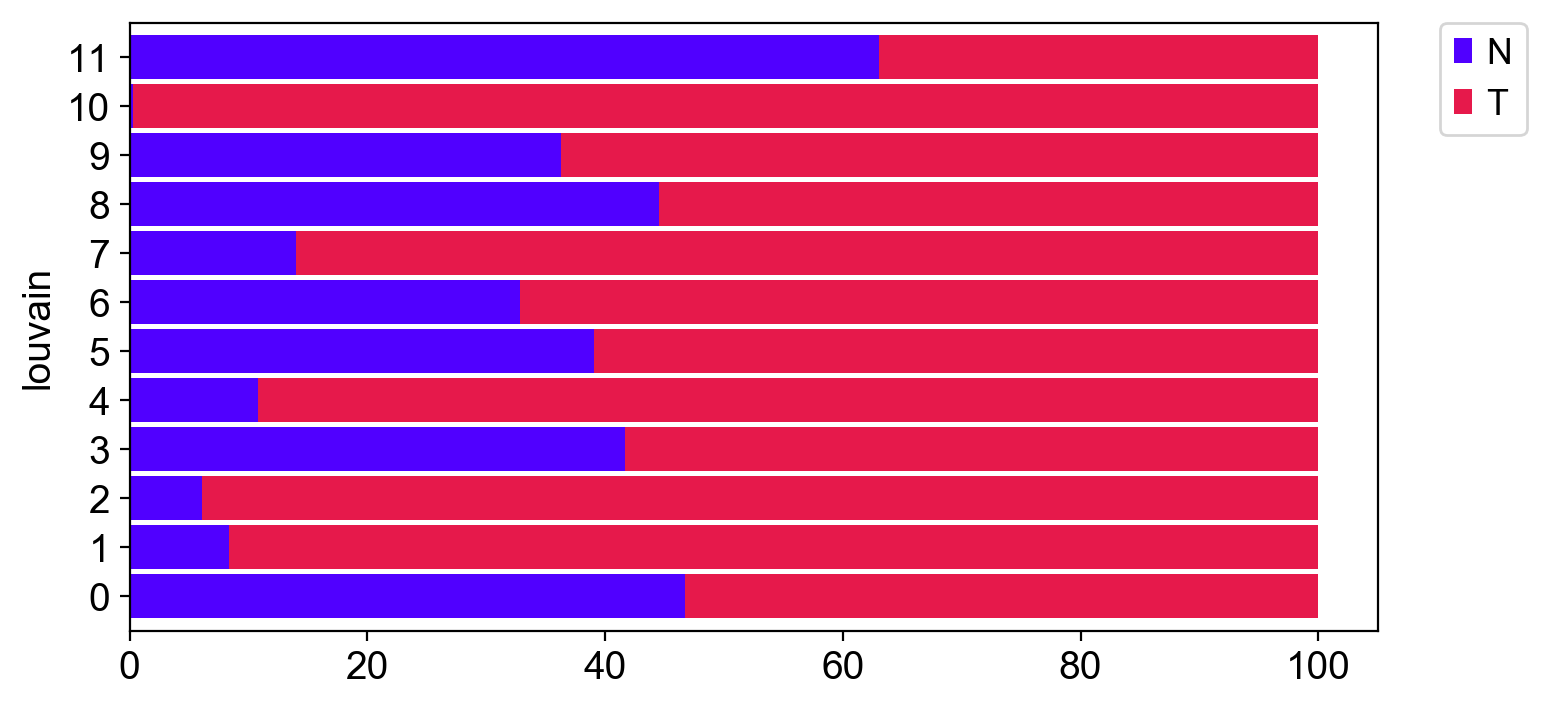

In [6]:
adata = sc.read("./data/myeloid_2.h5ad")

sc.settings.set_figure_params(dpi=100)
sc.pl.umap(adata, color='louvain', size = 25)#, save='_louvain.png')
display(adata)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size

count = pd.read_csv('patientno_count.csv', header=None, index_col=0)
df = adata.obs.groupby(['patientno','louvain']).size().unstack().fillna(0)
df = df.div(count.iloc[:,0], axis=0)
df1 = df.apply(lambda x: x/sum(x)*100, axis = 0).transpose()
ax = df1.plot.barh(stacked=True, color=adata.uns['patientno_colors'], width=0.9)
ax.grid(False)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = ax.get_figure()
fig.savefig('barplot_mye_patient.pdf')

df = adata.obs.groupby(['NormalvsTumor','louvain']).size().unstack().fillna(0)
df1 = df.apply(lambda x: x/sum(x)*100, axis = 0).transpose()
ax = df1.plot.barh(stacked=True, color=adata.uns['NormalvsTumor_colors'], width=0.9)
ax.grid(False)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = ax.get_figure()
fig.savefig('barplot_mye_NT.pdf')


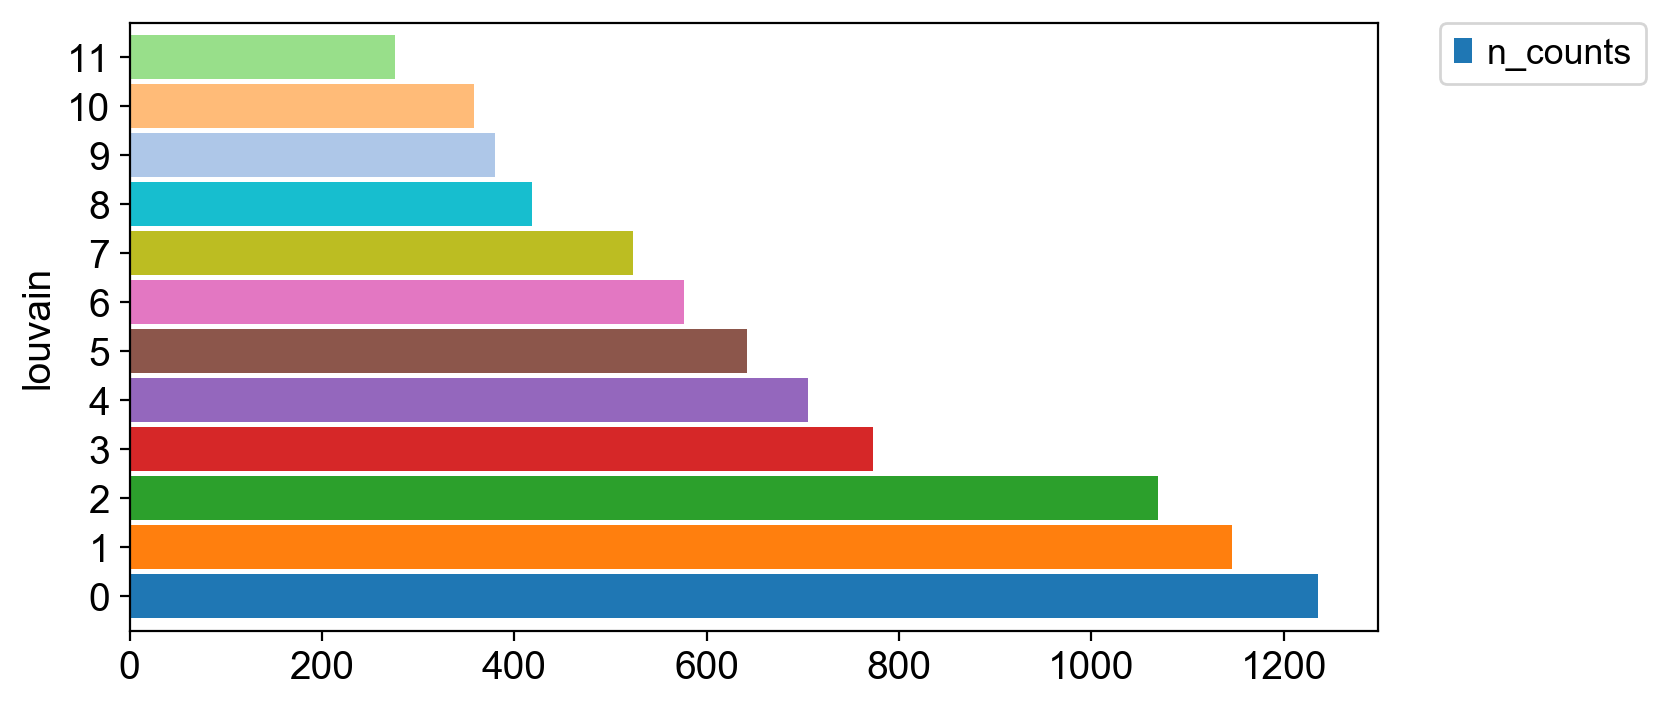

In [7]:
df = adata.obs.groupby(['louvain']).count()['n_counts']
ax = df.plot.barh(width=0.9, color=adata.uns['louvain_colors'])
ax.grid(False)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = ax.get_figure()
fig.savefig('barplot_mye_nocell.pdf')

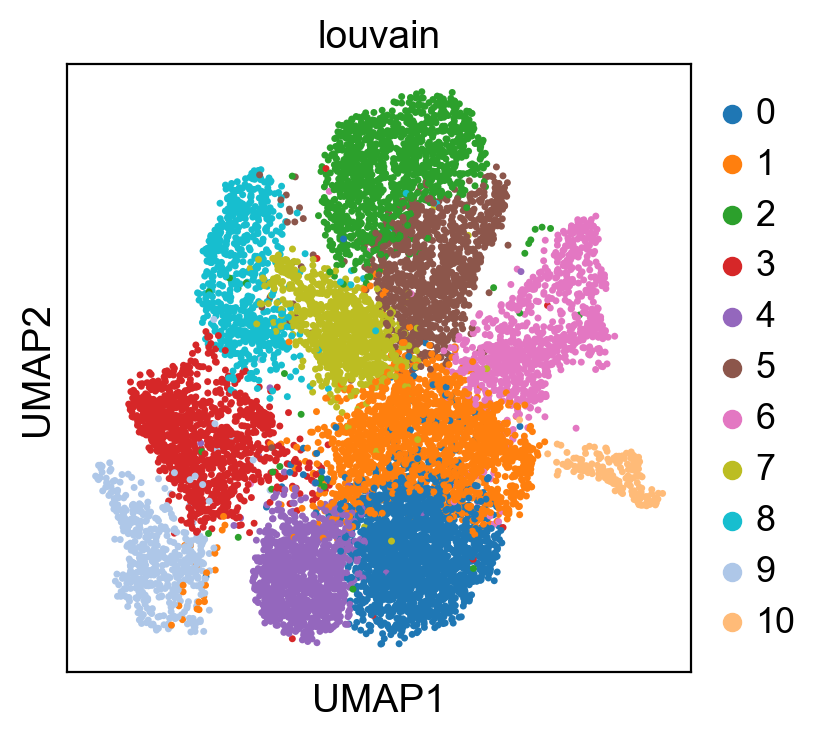

AnnData object with n_obs × n_vars = 11672 × 2608 
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain', 'patient_id', 'patient_tumorsection', 'NormalvsTumor', 'patientno', 'PNC', 'PIC', 'ViralvsNonViral', 'mean genes exp', 'median genes exp'
    var: 'gene_ids', 'n_cells'
    uns: 'NormalvsTumor_colors', 'PNC_colors', 'ViralvsNonViral_colors', 'louvain', 'louvain_colors', 'neighbors', 'patientno_colors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

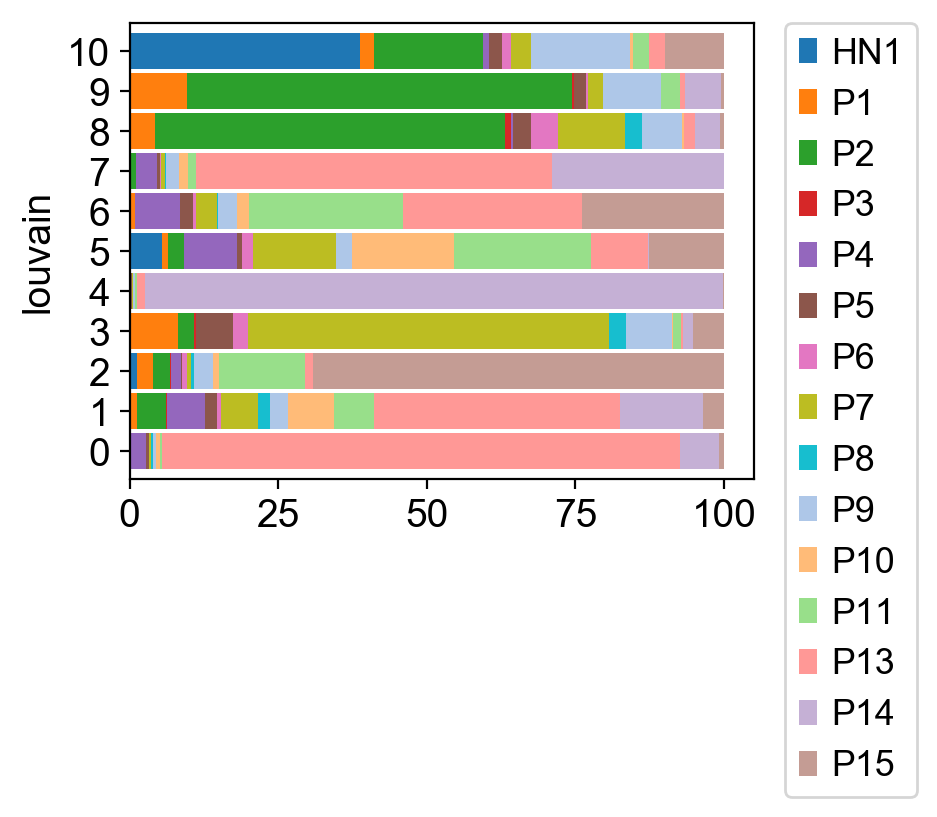

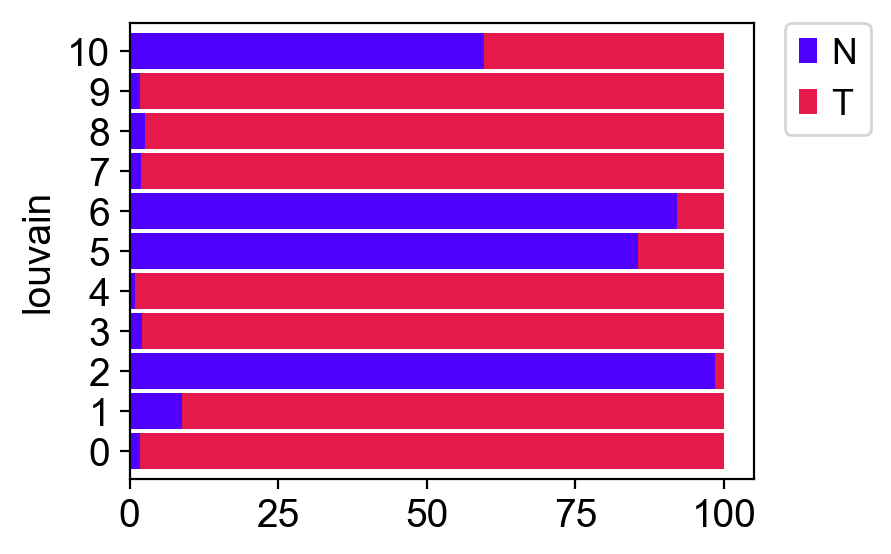

In [23]:
adata = sc.read("./data/endo_73k.h5ad")

sc.settings.set_figure_params(dpi=100)
sc.pl.umap(adata, color='louvain', size = 25)#, save='_louvain.png')
display(adata)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 4
fig_size[1] = 3
plt.rcParams["figure.figsize"] = fig_size

count = pd.read_csv('patientno_count.csv', header=None, index_col=0)
df = adata.obs.groupby(['patientno','louvain']).size().unstack().fillna(0)
df = df.div(count.iloc[:,0], axis=0)
df1 = df.apply(lambda x: x/sum(x)*100, axis = 0).transpose()
ax = df1.plot.barh(stacked=True, color=adata.uns['patientno_colors'], width=0.9)
ax.grid(False)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = ax.get_figure()
fig.savefig('./paper_figures1/endo/barplot_endo_patient.pdf')

df = adata.obs.groupby(['NormalvsTumor','louvain']).size().unstack().fillna(0)
df1 = df.apply(lambda x: x/sum(x)*100, axis = 0).transpose()
ax = df1.plot.barh(stacked=True, color=adata.uns['NormalvsTumor_colors'], width=0.9)
ax.grid(False)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = ax.get_figure()
fig.savefig('./paper_figures1/endo/barplot_endo_NT.pdf')


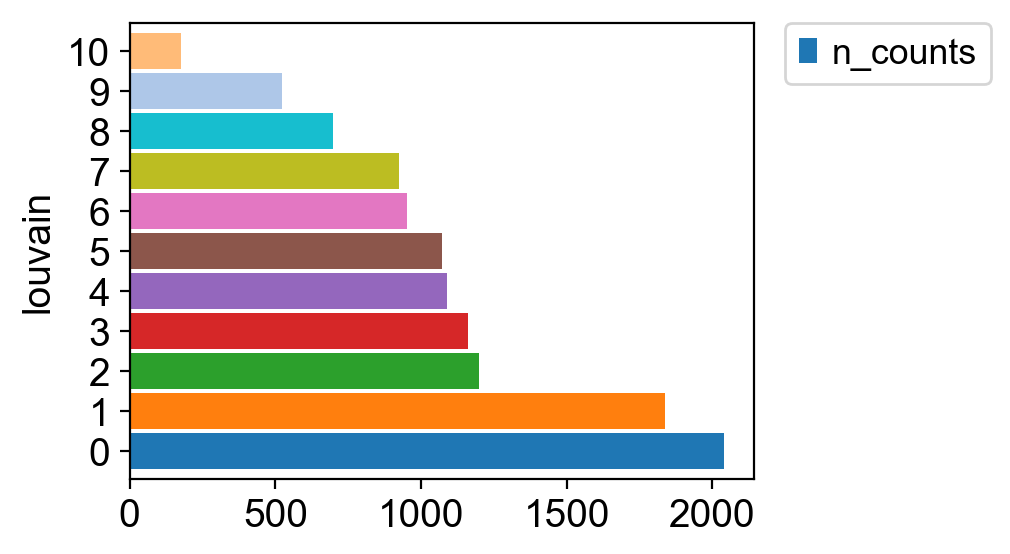

In [24]:
df = adata.obs.groupby(['louvain']).count()['n_counts']
ax = df.plot.barh(width=0.9, color=adata.uns['louvain_colors'])
ax.grid(False)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = ax.get_figure()
fig.savefig('./paper_figures1/endo/barplot_endo_nocell.pdf')

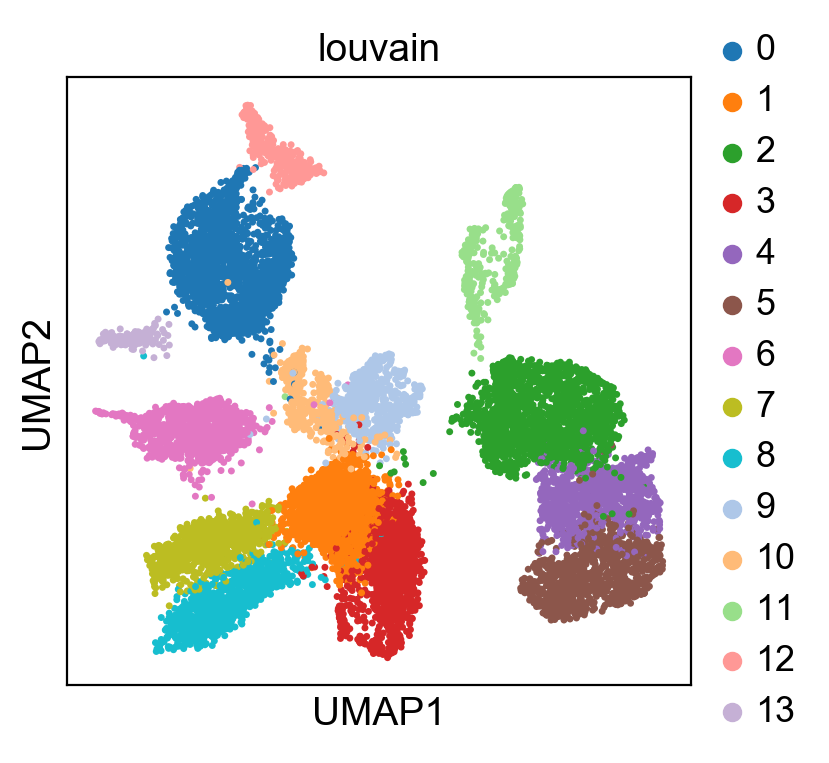

AnnData object with n_obs × n_vars = 12982 × 2608 
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain', 'patient_id', 'patient_tumorsection', 'NormalvsTumor', 'patientno', 'PNC', 'PIC', 'ViralvsNonViral'
    var: 'gene_ids', 'n_cells'
    uns: 'NormalvsTumor_colors', 'PNC_colors', 'ViralvsNonViral_colors', 'louvain', 'louvain_colors', 'neighbors', 'patientno_colors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

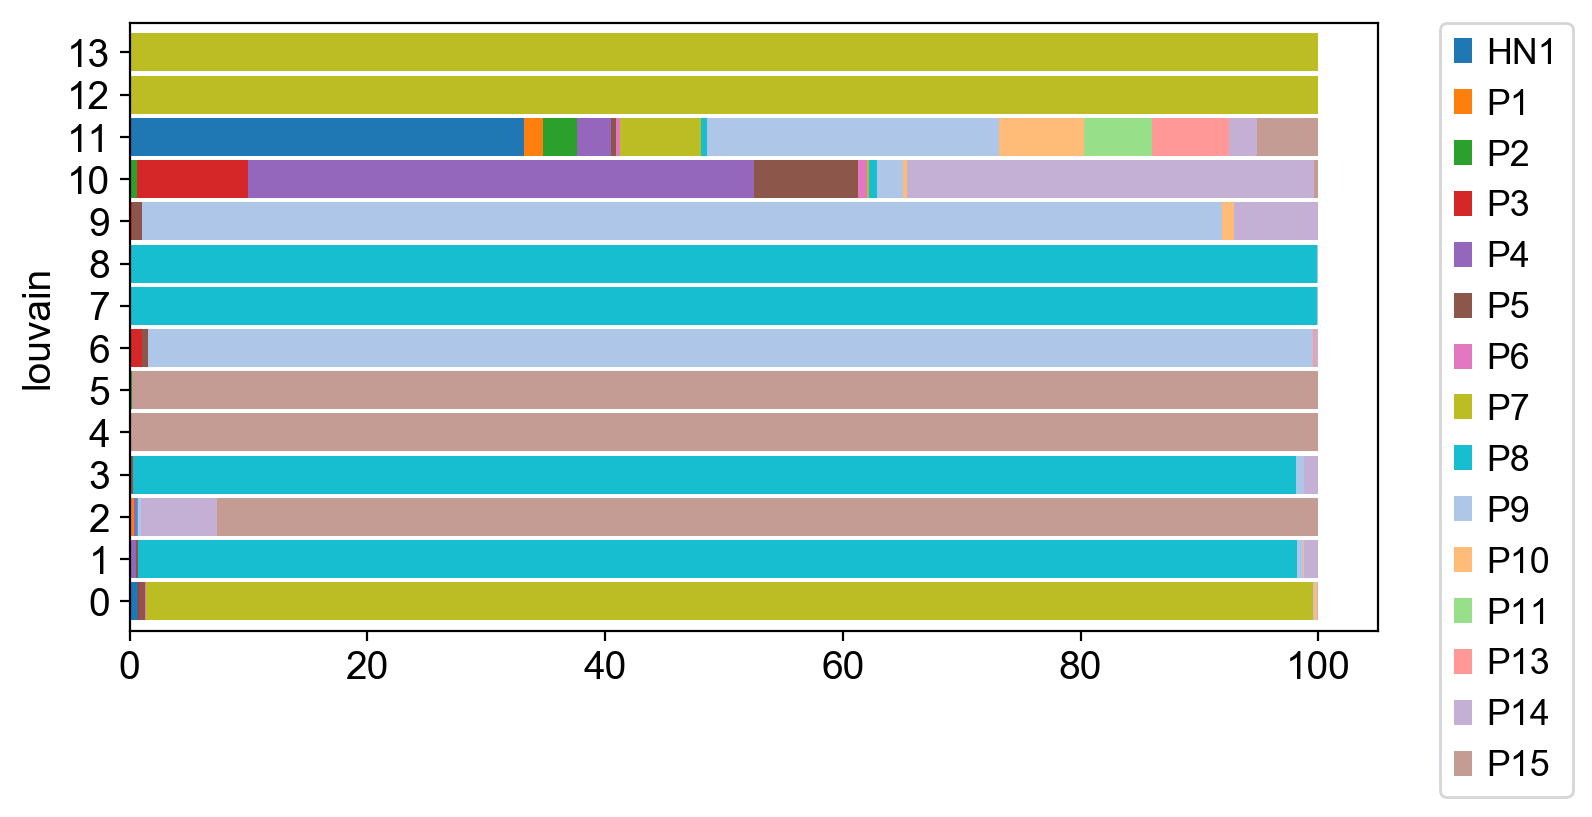

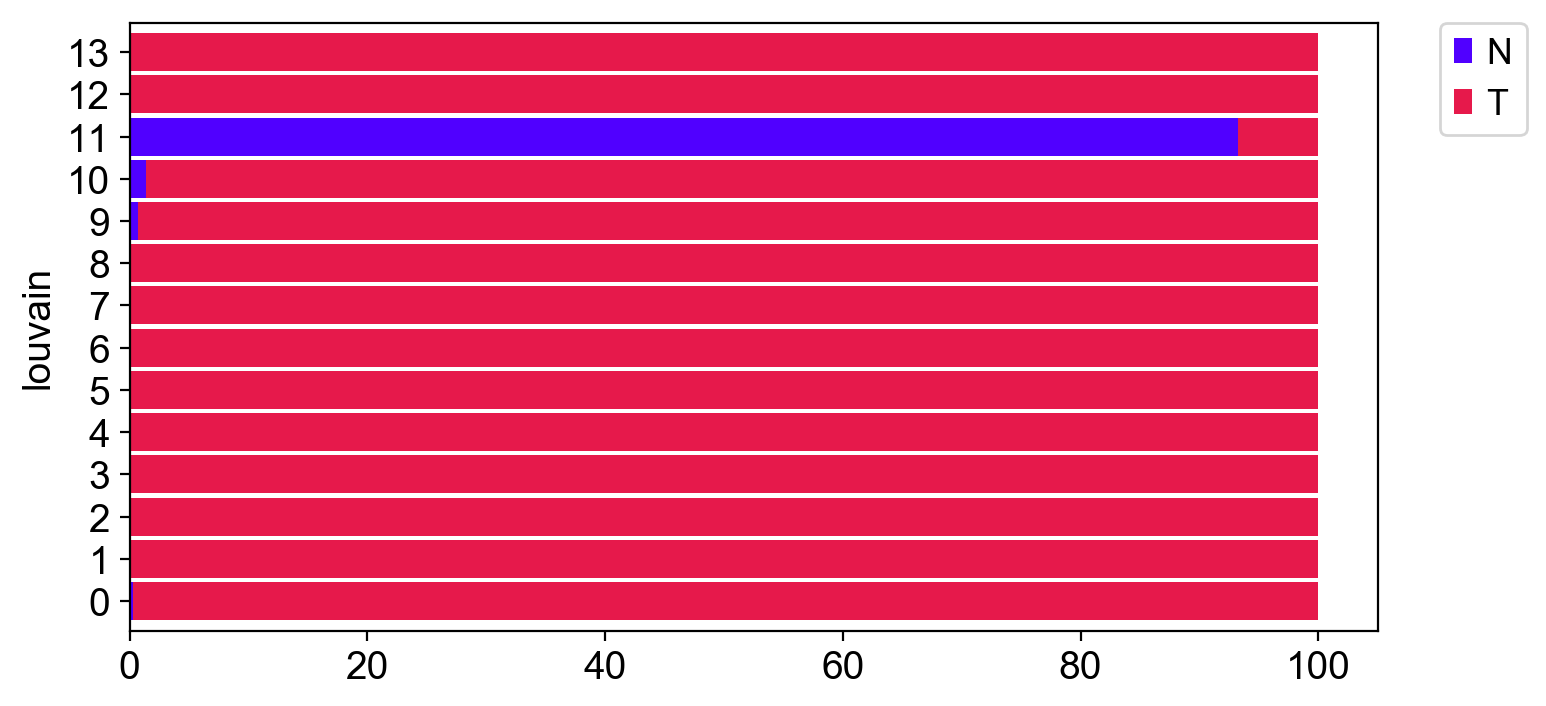

In [10]:
adata = sc.read("./data/hepa.h5ad")

sc.settings.set_figure_params(dpi=100)
sc.pl.umap(adata, color='louvain', size = 25)#, save='_louvain.png')
display(adata)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size

count = pd.read_csv('patientno_count.csv', header=None, index_col=0)
df = adata.obs.groupby(['patientno','louvain']).size().unstack().fillna(0)
df = df.div(count.iloc[:,0], axis=0)
df1 = df.apply(lambda x: x/sum(x)*100, axis = 0).transpose()
ax = df1.plot.barh(stacked=True, color=adata.uns['patientno_colors'], width=0.9)
ax.grid(False)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = ax.get_figure()
fig.savefig('barplot_hepa_patient.pdf')

df = adata.obs.groupby(['NormalvsTumor','louvain']).size().unstack().fillna(0)
df1 = df.apply(lambda x: x/sum(x)*100, axis = 0).transpose()
ax = df1.plot.barh(stacked=True, color=adata.uns['NormalvsTumor_colors'], width=0.9)
ax.grid(False)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = ax.get_figure()
fig.savefig('barplot_hepa_NT.pdf')


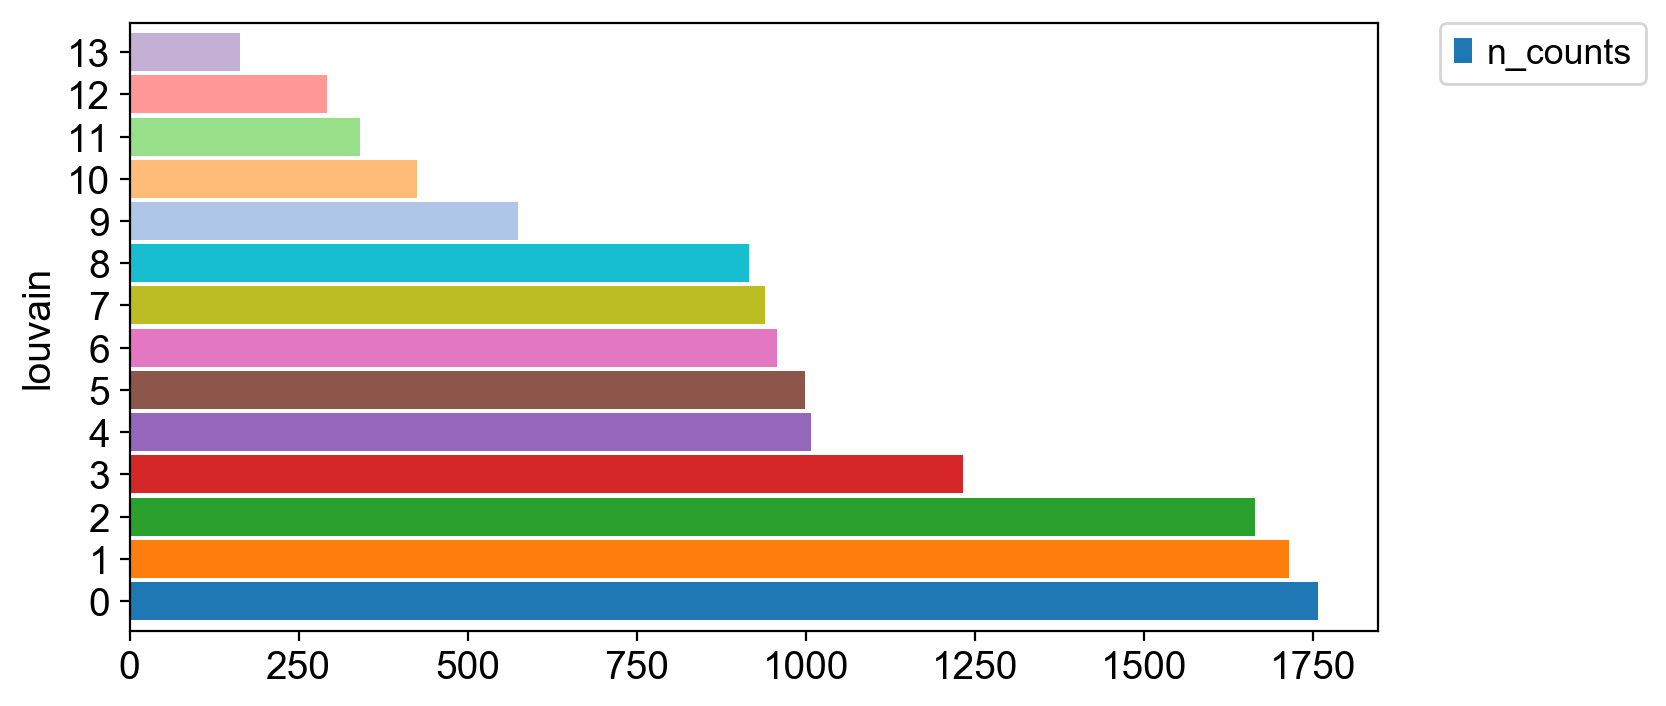

In [11]:
df = adata.obs.groupby(['louvain']).count()['n_counts']
ax = df.plot.barh(width=0.9, color=adata.uns['louvain_colors'])
ax.grid(False)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = ax.get_figure()
fig.savefig('barplot_hepa_nocell.pdf')

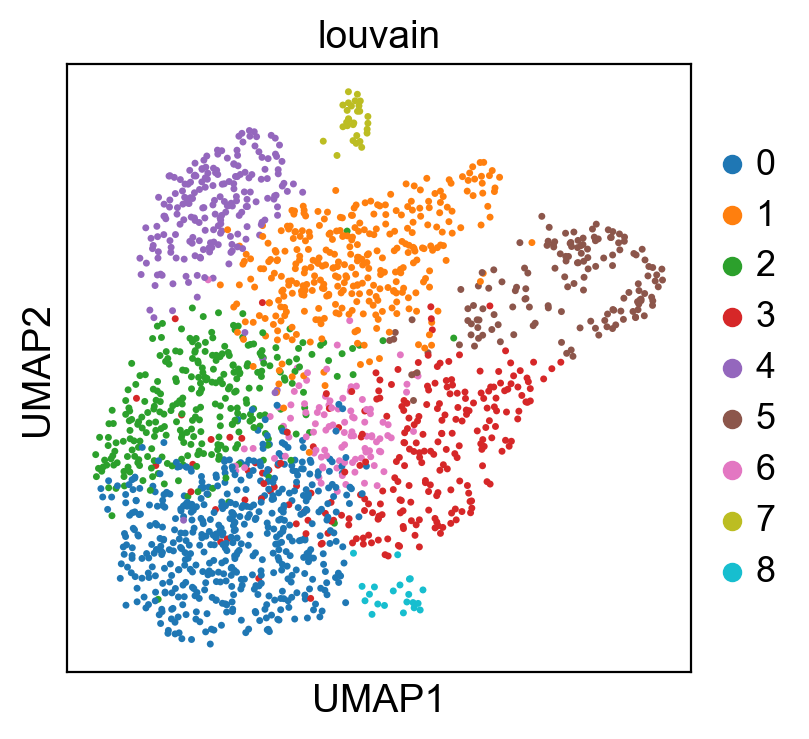

AnnData object with n_obs × n_vars = 1891 × 2608 
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain', 'patient_id', 'patient_tumorsection', 'NormalvsTumor', 'patientno', 'PNC', 'PIC', 'ViralvsNonViral'
    var: 'gene_ids', 'n_cells'
    uns: 'NormalvsTumor_colors', 'PNC_colors', 'ViralvsNonViral_colors', 'louvain', 'louvain_colors', 'neighbors', 'patientno_colors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

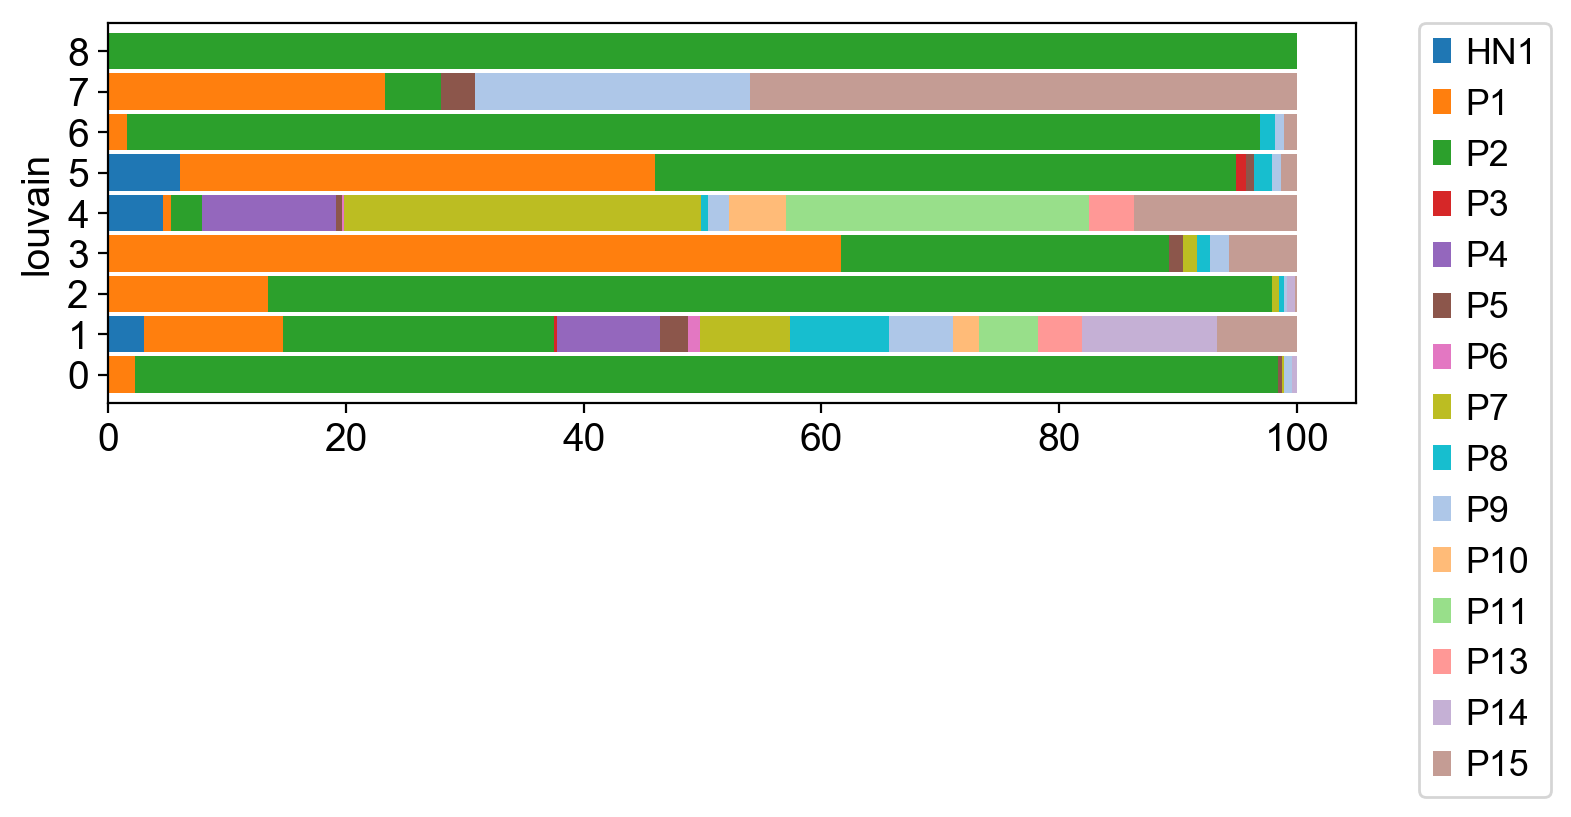

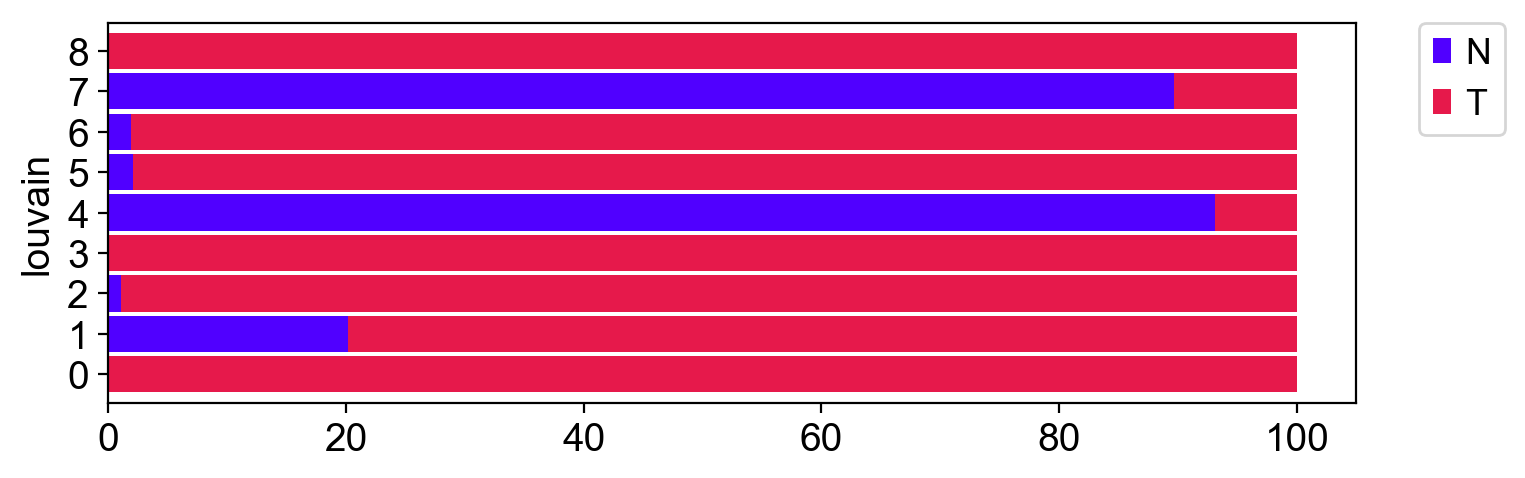

In [12]:
adata = sc.read("./data/fibro.h5ad")

sc.settings.set_figure_params(dpi=100)
sc.pl.umap(adata, color='louvain', size = 25)#, save='_louvain.png')
display(adata)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 2.5
plt.rcParams["figure.figsize"] = fig_size

count = pd.read_csv('patientno_count.csv', header=None, index_col=0)
df = adata.obs.groupby(['patientno','louvain']).size().unstack().fillna(0)
df = df.div(count.iloc[:,0], axis=0)
df1 = df.apply(lambda x: x/sum(x)*100, axis = 0).transpose()
ax = df1.plot.barh(stacked=True, color=adata.uns['patientno_colors'], width=0.9)
ax.grid(False)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = ax.get_figure()
fig.savefig('barplot_fibro_patient.pdf')

df = adata.obs.groupby(['NormalvsTumor','louvain']).size().unstack().fillna(0)
df1 = df.apply(lambda x: x/sum(x)*100, axis = 0).transpose()
ax = df1.plot.barh(stacked=True, color=adata.uns['NormalvsTumor_colors'], width=0.9)
ax.grid(False)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = ax.get_figure()
fig.savefig('barplot_fibro_NT.pdf')


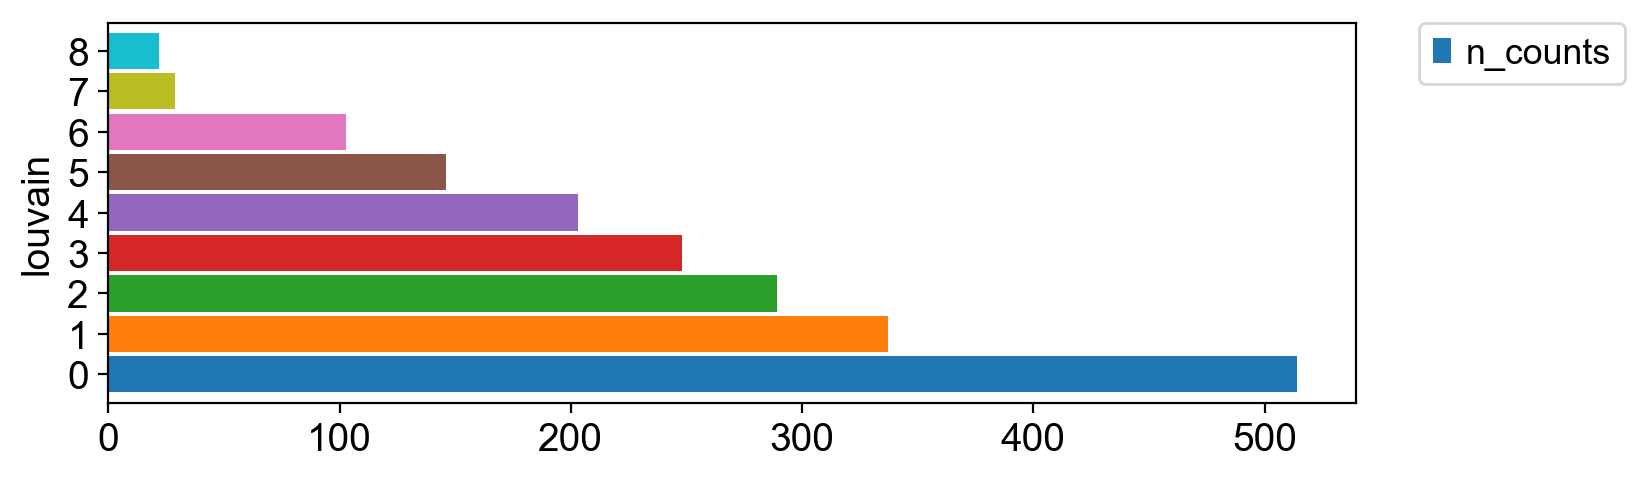

In [13]:
df = adata.obs.groupby(['louvain']).count()['n_counts']
ax = df.plot.barh(width=0.9, color=adata.uns['louvain_colors'])
ax.grid(False)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = ax.get_figure()
fig.savefig('barplot_fibro_nocell.pdf')